# Dairy Data Trends in the United States and beyond

In [2]:
%matplotlib inline

In [3]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
import pylab as pl
import requests
import json
import numpy as np
import matplotlib.transforms as mtrans
import mpl_toolkits.axes_grid1.inset_locator as inset
import seaborn
from matplotlib import collections
import matplotlib.patches as mpatches
import textwrap


In [4]:
# Import annual data as DataFrame
annual_milk_production = pd.read_csv("Resources/us_annual_milk_production_16-18.csv")
annual_milk_production.head()

Milk Production     2016     2017     2018
0      Production (23 States) (Mil. lb.)  199,434  202,455  204,825
1          Milk cows (23 States) (Thou.)    8,653    8,725    8,734
2         Milk per cow (23 States) (Lb.)   23,049   23,204   23,451
3  Production (U.S. estimate) (Mil. Lb.)  212,405  215,466  217,476

In [5]:
reset_milk_production = annual_milk_production.set_index('Milk Production')
reset_milk_production

2016     2017     2018
Milk Production                                                 
Production (23 States) (Mil. lb.)      199,434  202,455  204,825
Milk cows (23 States) (Thou.)            8,653    8,725    8,734
Milk per cow (23 States) (Lb.)          23,049   23,204   23,451
Production (U.S. estimate) (Mil. Lb.)  212,405  215,466  217,476

In [6]:
transpose_milk_production = reset_milk_production.transpose()
transpose_milk_production

Milk Production Production (23 States) (Mil. lb.)  \
2016                                      199,434   
2017                                      202,455   
2018                                      204,825   

Milk Production Milk cows (23 States) (Thou.) Milk per cow (23 States) (Lb.)  \
2016                                    8,653                         23,049   
2017                                    8,725                         23,204   
2018                                    8,734                         23,451   

Milk Production Production (U.S. estimate) (Mil. Lb.)  
2016                                          212,405  
2017                                          215,466  
2018                                          217,476

In [7]:
annual_milk_price = pd.read_csv("Resources/us_annual_milk_price_16-18.csv")
annual_milk_price.head()

Milk Price   2016   2017   2018
0                                All milk (Dol./cwt)  16.30  17.60  16.20
1        Class III (cheese milk) 3.5% fat (Dol./cwt)  14.87  16.17  14.61
2  Class IV (butter-powder milk) 3.5% fat (Dol./cwt)  13.77  15.16  14.23

In [8]:
reset_milk_price = annual_milk_price.set_index('Milk Price')
reset_milk_price

2016   2017   2018
Milk Price                                                            
All milk (Dol./cwt)                                16.30  17.60  16.20
Class III (cheese milk) 3.5% fat (Dol./cwt)        14.87  16.17  14.61
Class IV (butter-powder milk) 3.5% fat (Dol./cwt)  13.77  15.16  14.23

In [9]:
transpose_milk_price = reset_milk_price.transpose()
transpose_milk_price


Milk Price  All milk (Dol./cwt)  Class III (cheese milk) 3.5% fat (Dol./cwt)  \
2016                       16.3                                        14.87   
2017                       17.6                                        16.17   
2018                       16.2                                        14.61   

Milk Price  Class IV (butter-powder milk) 3.5% fat (Dol./cwt)  
2016                                                    13.77  
2017                                                    15.16  
2018                                                    14.23

In [10]:
merge_production_price = transpose_milk_production.merge(transpose_milk_price, on=transpose_milk_production.index)
merge_production_price

key_0 Production (23 States) (Mil. lb.) Milk cows (23 States) (Thou.)  \
0  2016                           199,434                         8,653   
1  2017                           202,455                         8,725   
2  2018                           204,825                         8,734   

  Milk per cow (23 States) (Lb.) Production (U.S. estimate) (Mil. Lb.)  \
0                         23,049                               212,405   
1                         23,204                               215,466   
2                         23,451                               217,476   

   All milk (Dol./cwt)  Class III (cheese milk) 3.5% fat (Dol./cwt)  \
0                 16.3                                        14.87   
1                 17.6                                        16.17   
2                 16.2                                        14.61   

   Class IV (butter-powder milk) 3.5% fat (Dol./cwt)  
0                                              13.77  
1                                              15.16  
2                                              14.23

In [11]:
reset_merge = merge_production_price.set_index('key_0')
reset_merge

Production (23 States) (Mil. lb.) Milk cows (23 States) (Thou.)  \
key_0                                                                   
2016                            199,434                         8,653   
2017                            202,455                         8,725   
2018                            204,825                         8,734   

      Milk per cow (23 States) (Lb.) Production (U.S. estimate) (Mil. Lb.)  \
key_0                                                                        
2016                          23,049                               212,405   
2017                          23,204                               215,466   
2018                          23,451                               217,476   

       All milk (Dol./cwt)  Class III (cheese milk) 3.5% fat (Dol./cwt)  \
key_0                                                                     
2016                  16.3                                        14.87   
2017                  17.6                                        16.17   
2018                  16.2                                        14.61   

       Class IV (butter-powder milk) 3.5% fat (Dol./cwt)  
key_0                                                     
2016                                               13.77  
2017                                               15.16  
2018                                               14.23

In [12]:
renamed_milk_price_production = reset_merge.rename_axis('Year')
renamed_milk_price_production 

Production (23 States) (Mil. lb.) Milk cows (23 States) (Thou.)  \
Year                                                                   
2016                           199,434                         8,653   
2017                           202,455                         8,725   
2018                           204,825                         8,734   

     Milk per cow (23 States) (Lb.) Production (U.S. estimate) (Mil. Lb.)  \
Year                                                                        
2016                         23,049                               212,405   
2017                         23,204                               215,466   
2018                         23,451                               217,476   

      All milk (Dol./cwt)  Class III (cheese milk) 3.5% fat (Dol./cwt)  \
Year                                                                     
2016                 16.3                                        14.87   
2017                 17.6                                        16.17   
2018                 16.2                                        14.61   

      Class IV (butter-powder milk) 3.5% fat (Dol./cwt)  
Year                                                     
2016                                              13.77  
2017                                              15.16  
2018                                              14.23

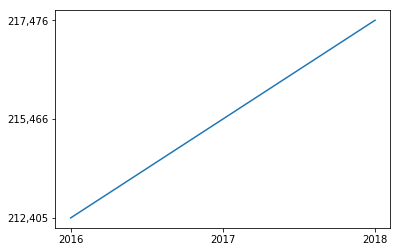

In [13]:
# Plot the line
x_axis = renamed_milk_price_production.index
y_axis = renamed_milk_price_production["Production (U.S. estimate) (Mil. Lb.)"]

plt.plot(x_axis, y_axis)
plt.show()

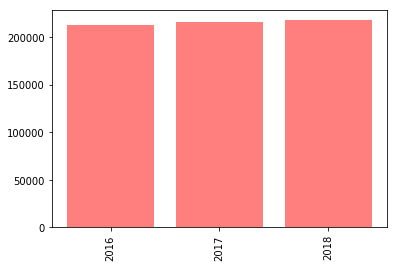

In [14]:
#Chart Milk Production as Bar Chart
#plt.figure(figsize=(20,3))
y_pos_bar = np.arange(len(renamed_milk_price_production))
amount_string = renamed_milk_price_production["Production (U.S. estimate) (Mil. Lb.)"]
height= [int(i.replace(',', '')) for i in amount_string] 
tick_locations = [value for value in y_pos_bar]
plt.bar(y_pos_bar, height, color='r', alpha=0.5 )
plt.xticks(tick_locations, amount_string.index, rotation="vertical")
plt.show()

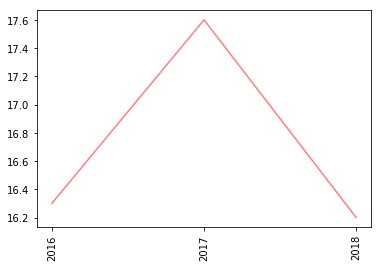

In [15]:
#Chart Milk Price as Line Chart

y_pos_line= np.arange(len(renamed_milk_price_production))
line_height = renamed_milk_price_production["All milk (Dol./cwt)"]
tick_locations = [value for value in y_pos_line]
plt.plot(y_pos_line, line_height, color='r', alpha=0.5 )
plt.xticks(tick_locations, line_height.index, rotation="vertical")
plt.show()

[0.146, 0.157, 0.145]


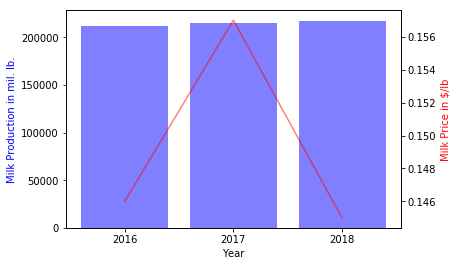

In [16]:
#Create Bar Chart // Line Chart Combination

fig, ax1 = plt.subplots()
amount_string = renamed_milk_price_production["Production (U.S. estimate) (Mil. Lb.)"]

#If want to convert Million lbs to CWT // divid the mass by 112
#212,405,000,000 / 112 = 1896473214.28571 cwt

height= [int(i.replace(',', '')) for i in amount_string] 
y_pos_bar = amount_string.index
tick_locations = [value for value in y_pos_bar]
ax1.bar(y_pos_bar, height, color='b', alpha=0.5 )
ax1.set_ylabel('Milk Production in mil. lb.', color='b')
ax1.set_xlabel('Year')
ax1.tick_params(tick_locations, colors='b')
#If want to convert $/CWT to $/pounds then divid $/cwt by 112 lbs
#16.3 $/cwt = 16.3/112 = 0.145 $/lb

ax2 = ax1.twinx()

y_pos_line= np.arange(len(renamed_milk_price_production))
line_height = renamed_milk_price_production["All milk (Dol./cwt)"]
#print(line_height)

#Convert CWT to pounds // multiply the mass value by 112
line_height_converted = [round((value/112),3) for value in line_height]
print(line_height_converted)

tick_locations = [value for value in y_pos_line]
ax2.plot(y_pos_line, line_height_converted, color='r', alpha=0.5 )
ax2.set_ylabel("Milk Price in $/lb", color = "r")


#fig.tight_layout()
plt.show()


In [22]:
# Import annual data of price and production from 2010 - 2019 as DataFrame
annual_milk_production_price = pd.read_csv("Resources/us_annual_milk_production_price_10-19.csv")
annual_milk_production_price

Year  Production (billion lb.)  Production (lbs.)  Price ($/cwt)  \
0  2010                    192.80       192800000000          16.29   
1  2011                    196.10       196100000000          20.50   
2  2012                    200.30       200300000000          18.50   
3  2013                    201.20       201200000000          19.15   
4  2014                    206.00       206000000000          23.97   
5  2015                    208.60       208600000000          17.13   
6  2016                    212.41       212410000000          16.30   
7  2017                    215.47       215000000000          17.60   
8  2018                    217.48       217480000000          16.20   
9  2019                    219.70       219700000000          16.37   

   Price ($/lb.)  
0          0.145  
1          0.183  
2          0.165  
3          0.171  
4          0.214  
5          0.153  
6          0.146  
7          0.157  
8          0.145  
9          0.146

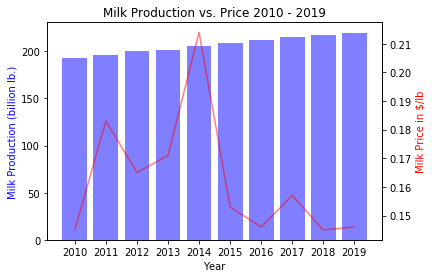

In [18]:
#Create Bar Chart // Line Chart Combination

fig, ax1 = plt.subplots()

#Bar Chart
height= annual_milk_production_price["Production (billion lb.)"] 
y_pos_bar = np.arange(len(annual_milk_production_price))
tick_labels = [value for value in annual_milk_production_price["Year"]]
ax1.bar(y_pos_bar, height, color='b', alpha=0.5 )
ax1.set_ylabel('Milk Production (billion lb.)', color='b')
ax1.set_xlabel('Year')
ax1.set_xticks(y_pos_bar)
ax1.set_xticklabels(tick_labels)
ax1.set_title('Milk Production vs. Price 2010 - 2019')

ax2 = ax1.twinx()

y_pos_line= np.arange(len(annual_milk_production_price))
line_height = annual_milk_production_price["Price ($/lb.)"]
ax2.plot(y_pos_line, line_height, color='r', alpha=0.5 )
ax2.set_ylabel("Milk Price in $/lb", color = "r")

# Save Figure
plt.savefig("Outputs/MilkProductionvsPrice.png")

#Show Figure
#fig.tight_layout()
plt.show()





In [20]:
# Import annual data as DataFrame
annual_milk_production_factors = pd.read_csv("Resources/us_annual_milk_production_factors_80-18_fixed.csv")
annual_milk_production_factors.head()

Year Milk cows and heifers that have calved (thousand)  \
0  1980                                            10,758   
1  1981                                            10,849   
2  1982                                            10,986   
3  1983                                            11,047   
4  1984                                            11,059   

  Milk cows and heifers that have calved  \
0                             10,758,000   
1                             10,849,000   
2                             10,986,000   
3                             11,047,000   
4                             11,059,000   

  Replacement heifers, 500+ lbs. (thousand)  Replacement heifers, 500+ lbs.  \
0                                     4,159                         4159000   
1                                     4,342                         4342000   
2                                     4,547                         4547000   
3                                     4,545                         4545000   
4                                     4,533                         4533000   

   Replace-ments per 100 cows (thousand)  \
0                                   38.7   
1                                   40.0   
2                                   41.4   
3                                   41.1   
4                                   41.0   

   Average number of milk cows in the U.S. (thousand)  \
0                                              10799    
1                                              10898    
2                                              11011    
3                                              11059    
4                                              10793    

   Average number of milk cows in the U.S.  Milk per cow (lbs.)  \
0                                 10799000                11891   
1                                 10898000                12183   
2                                 11011000                12306   
3                                 11059000                12622   
4                                 10793000                12541   

   Milk production (million pounds)             ...               \
0                            128406             ...                
1                            132770             ...                
2                            135505             ...                
3                            139588             ...                
4                            135351             ...                

   Average price paid for milk (dollars per cwt)  \
0                                           13.0   
1                                           13.8   
2                                           13.6   
3                                           13.6   
4                                           13.5   

   Average price paid for milk ($/lb.)  Dairy ration value (dollars per cwt)  \
0                                0.130                                  4.84   
1                                0.138                                  5.04   
2                                0.136                                  4.42   
3                                0.136                                  5.24   
4                                0.135                                  5.34   

   Dairy ration value ($/ lb)  Milk-feed ratio  \
0                      0.0484             2.72   
1                      0.0504             2.76   
2                      0.0442             3.09   
3                      0.0524             2.61   
4                      0.0534             2.54   

   Milk Cow Price (dollars per head)  \
0                               1190   
1                               1200   
2                               1110   
3                               1030   
4                                895   

   Milk Cow Cost, Milk volume required to buy a cow (pounds)  \
0                                               9154           
1           

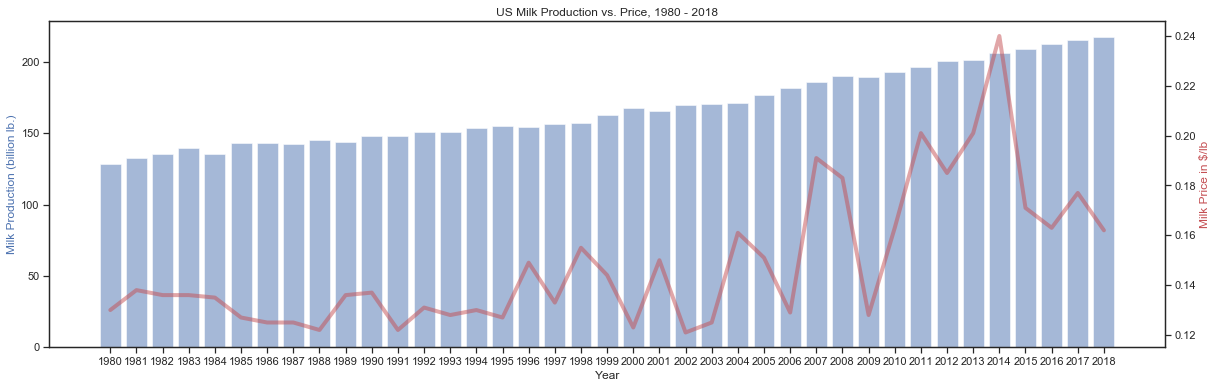

In [76]:
#Create Bar Chart // Line Chart Combination

fig, ax1 = plt.subplots(figsize=(20,6))

#Bar Chart
height= annual_milk_production_factors["Milk production (billion lbs)"] 
y_pos_bar = np.arange(len(annual_milk_production_factors))
tick_labels = [value for value in annual_milk_production_factors["Year"]]
ax1.bar(y_pos_bar, height, color='b', alpha=0.5 )
ax1.set_ylabel('Milk Production (billion lb.)', color='b')
ax1.set_xlabel('Year')
ax1.set_xticks(y_pos_bar)
ax1.set_xticklabels(tick_labels)
ax1.set_title('US Milk Production vs. Price, 1980 - 2018')

ax2 = ax1.twinx()

y_pos_line= np.arange(len(annual_milk_production_factors))
line_height = annual_milk_production_factors["Average price paid for milk ($/lb.)"]
ax2.plot(y_pos_line, line_height, color='r', alpha=0.5, linewidth=4.0 )
ax2.set_ylabel("Milk Price in $/lb", color = "r")


# Save Figure
plt.savefig("Outputs/MilkProductionvsPrice_80-18.png")

#Show Figure
#fig.tight_layout()
plt.show()

In [20]:
annual_milk_production_factors_slim = pd.read_csv("Resources/us_annual_milk_production_factors_slim_fixed.csv")
annual_milk_production_factors_slim

Year  Average number of milk cows in the U.S. (million)  \
0  1989                                             10.046   
1  1998                                              9.151   
2  2008                                              9.314   
3  2018                                              9.399   

   Milk per cow (thousand lbs.)  Milk production (billion lbs.)  \
0                        14.323                         143.893   
1                        17.185                         157.262   
2                        20.397                         189.978   
3                        23.149                         217.575   

   Dairy ration value ($/cwt)  Milk Cow Price ($/head)  \
0                        5.07                     1030   
1                        4.73                     1120   
2                        9.17                     1950   
3                        7.96                     1360   

   Alfalfa hay price received by farmers ($/ton)  Slaughter cow price ($/cwt)  
0                                          95.98                        50.11  
1                                          94.28                        35.54  
2                                         161.33                        51.44  
3                                         174.58                        57.43

[   9.399   23.149  217.575    7.96  1360.     174.58    57.43 ]
[10.046  9.151  9.314  9.399]


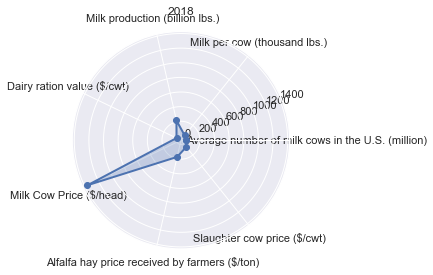

In [21]:
labels=np.array(['Average number of milk cows in the U.S. (million)', 'Milk per cow (thousand lbs.)', 'Milk production (billion lbs.)', 'Dairy ration value ($/cwt)', 'Milk Cow Price ($/head)', 'Alfalfa hay price received by farmers ($/ton)', 'Slaughter cow price ($/cwt)'])
stats=annual_milk_production_factors_slim.loc[3,labels].values
print(stats)
extra = annual_milk_production_factors_slim["Average number of milk cows in the U.S. (million)"].values
print(extra)
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

seaborn.set()
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(annual_milk_production_factors_slim.loc[3,"Year"])
ax.grid(True)
plt.show()

In [22]:
reset_annual_milk_production_factors_slim = annual_milk_production_factors_slim.set_index('Year')
reset_annual_milk_production_factors_slim

Average number of milk cows in the U.S. (million)  \
Year                                                      
1989                                             10.046   
1998                                              9.151   
2008                                              9.314   
2018                                              9.399   

      Milk per cow (thousand lbs.)  Milk production (billion lbs.)  \
Year                                                                 
1989                        14.323                         143.893   
1998                        17.185                         157.262   
2008                        20.397                         189.978   
2018                        23.149                         217.575   

      Dairy ration value ($/cwt)  Milk Cow Price ($/head)  \
Year                                                        
1989                        5.07                     1030   
1998                        4.73                     1120   
2008                        9.17                     1950   
2018                        7.96                     1360   

      Alfalfa hay price received by farmers ($/ton)  \
Year                                                  
1989                                          95.98   
1998                                          94.28   
2008                                         161.33   
2018                                         174.58   

      Slaughter cow price ($/cwt)  
Year                               
1989                        50.11  
1998                        35.54  
2008                        51.44  
2018                        57.43

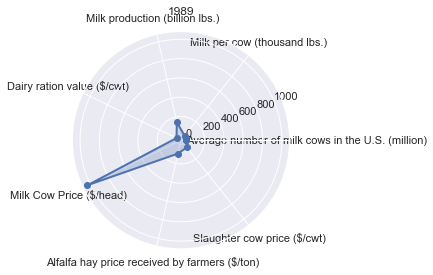

In [23]:
labels=np.array(['Average number of milk cows in the U.S. (million)', 'Milk per cow (thousand lbs.)', 'Milk production (billion lbs.)', 'Dairy ration value ($/cwt)', 'Milk Cow Price ($/head)', 'Alfalfa hay price received by farmers ($/ton)', 'Slaughter cow price ($/cwt)'])
stats=annual_milk_production_factors_slim.loc[0,labels].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

seaborn.set()
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(annual_milk_production_factors_slim.loc[0,"Year"])
ax.grid(True)
plt.show()

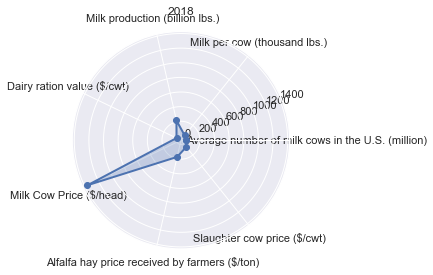

In [24]:
labels=np.array(['Average number of milk cows in the U.S. (million)', 'Milk per cow (thousand lbs.)', 'Milk production (billion lbs.)', 'Dairy ration value ($/cwt)', 'Milk Cow Price ($/head)', 'Alfalfa hay price received by farmers ($/ton)', 'Slaughter cow price ($/cwt)'])
stats=annual_milk_production_factors_slim.loc[3,labels].values
#print(stats)
extra = annual_milk_production_factors_slim["Average number of milk cows in the U.S. (million)"].values
#print(extra)
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

seaborn.set()
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(annual_milk_production_factors_slim.loc[3,"Year"])
ax.grid(True)
plt.show()

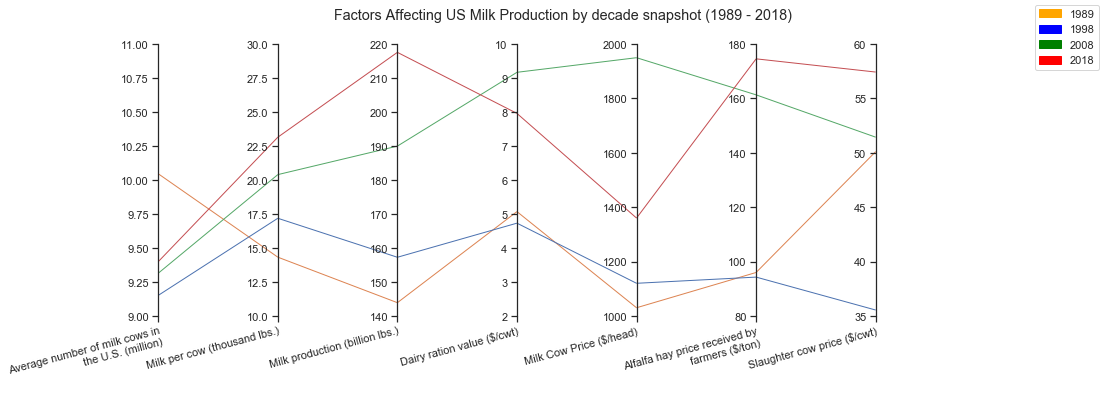

In [74]:
seaborn.set(style='ticks')

def connect_spines(left_ax, right_ax, left_y, right_y, **line_kwds):
    left_trans = mtrans.blended_transform_factory(left_ax.transData, left_ax.transAxes)
    right_trans = mtrans.blended_transform_factory(right_ax.transData, right_ax.transAxes)

    left_data_trans = left_ax.transScale + left_ax.transLimits
    right_data_trans = right_ax.transScale + right_ax.transLimits
    
    left_pos = left_data_trans.transform((0, left_y))[1]
    right_pos = right_data_trans.transform((0, right_y))[1]
    
    bbox = mtrans.Bbox.from_extents(0, left_pos, 0, right_pos)
    right_bbox = mtrans.TransformedBbox(bbox, right_trans)
    left_bbox = mtrans.TransformedBbox(bbox, left_trans)

    connecter = inset.BboxConnector(left_bbox, right_bbox, loc1=3, loc2=2, **line_kwds)
    connecter.set_clip_on(False)
    
    return connecter


data = reset_annual_milk_production_factors_slim.values
columns = [
'Average number of milk cows in the U.S. (million)', 
    'Milk per cow (thousand lbs.)', 
    'Milk production (billion lbs.)', 
    'Dairy ration value ($/cwt)', 
    'Milk Cow Price ($/head)', 
    'Alfalfa hay price received by farmers ($/ton)', 
    'Slaughter cow price ($/cwt)'
]

#seaborn.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 10})

with seaborn.axes_style('ticks'):
    fig, axes = plt.subplots(ncols=7, figsize=(15,5))
    colors = dict(zip(np.unique(data[:, -1]), seaborn.color_palette(n_colors=4)))
    axes[0].set_ylim(9, 11)
    axes[1].set_ylim(10, 30)
    axes[2].set_ylim(140, 220)
    axes[3].set_ylim(2, 10)
    axes[4].set_ylim(1000, 2000)
    axes[5].set_ylim(80, 180)
    axes[6].set_ylim(35, 60)
    
    
    for n, (ax1, ax2) in enumerate(zip(axes[:-1], axes[1:])):
        lines = []
        
        for row in reset_annual_milk_production_factors_slim.values:
            line = connect_spines(ax1, ax2, row[n], row[n+1], color=colors[row[-1]])
            ax1.add_line(line)
            

    for n, ax in enumerate(axes):
        ax.set_xticks([0])
        mean_length = np.mean([len(i) for i in columns])
        columns2 = ["\n".join(textwrap.wrap(i,mean_length)) for i in columns]
        ax.set_xticklabels([columns2[n]], rotation=15, ha="right",rotation_mode='anchor')
      
    fig.subplots_adjust(wspace=0)
    #fig.legend()
    seaborn.despine(fig=fig, bottom=True, trim=True)
   
    #legend_labels = [value for value in reset_annual_milk_production_factors_slim.index]
    #print(legend_labels)
    #plt.legend([value for value in lines], [value for value in reset_annual_milk_production_factors_slim.index])

orange = mpatches.Patch(color='orange', label='1989')
blue = mpatches.Patch(color='blue', label='1998')
green = mpatches.Patch(color='green', label='2008')
red = mpatches.Patch(color='red', label='2018')
fig.legend(handles=[orange, blue, green, red])
fig.suptitle("Factors Affecting US Milk Production by decade snapshot (1989 - 2018)")

# Save Figure
plt.savefig("Outputs/MilkProductionFactors_80-18.png")

#Show Figure
#plt.show

#Resources for Radar Charts
#https://gist.github.com/phobson/9de120cabde660ec734c
#https://stackoverflow.com/questions/33028843/how-to-remove-polar-gridlines-and-add-major-axis-ticks
#https://stackoverflow.com/questions/44670229/how-do-i-display-multiple-radar-charts-with-differently-scaled-axes-each-in-one


In [33]:
utilization_supply_milk = pd.read_csv("Resources/us_supply_and_utilization_80-17_milk_only.csv")
utilization_supply_milk

Year  Milk Total Supply (million pounds)  \
0   1980                              139238   
1   1981                              148225   
2   1982                              156534   
3   1983                              162501   
4   1984                              160943   
5   1985                              162572   
6   1986                              159538   
7   1987                              158121   
8   1988                              154901   
9   1989                              154769   
10  1990                              159447   
11  1991                              163681   
12  1992                              169208   
13  1993                              167656   
14  1994                              166052   
15  1995                              163246   
16  1996                              160557   
17  1997                              163448   
18  1998                              166733   
19  1999                              172546   
20  2000                              177683   
21  2001                              178349   
22  2002                              183030   
23  2003                              186161   
24  2004                              186148   
25  2005                              191258   
26  2006                              196808   
27  2007                              201815   
28  2008                              205011   
29  2009                              204303   
30  2010                              207617   
31  2011                              209845   
32  2012                              214978   
33  2013                              216406   
34  2014                              220770   
35  2015                              224843   
36  2016                              231677   
37  2017                              234165   

    Milk Total Utilization (million pounds)  
0                                    126112  
1                                    129673  
2                                    136238  
3                                    139650  
4                                    144159  
5                                    148890  
6                                    146616  
7                                    150648  
8                                    146523  
9                                    145733  
10                                   146088  
11                                   147841  
12                                   154994  
13                                   158086  
14                                   160392  
15                                   159341  
16                                   156117  
17                                   158837  
18                                   161721  
19                                   166749  
20                                   171150  
21                                   171529  
22                                   173388  
23                                   177872  
24                                   179242  
25                                   183716  
26                                   187825  
27                                   192042  
28                                   195469  
29                                   193606  
30                                   197531  
31                                   199619  
32                                   203575  
33                                   206062  
34                                   210283  
35                                   212508  
36                                   218955  
37                                   220726

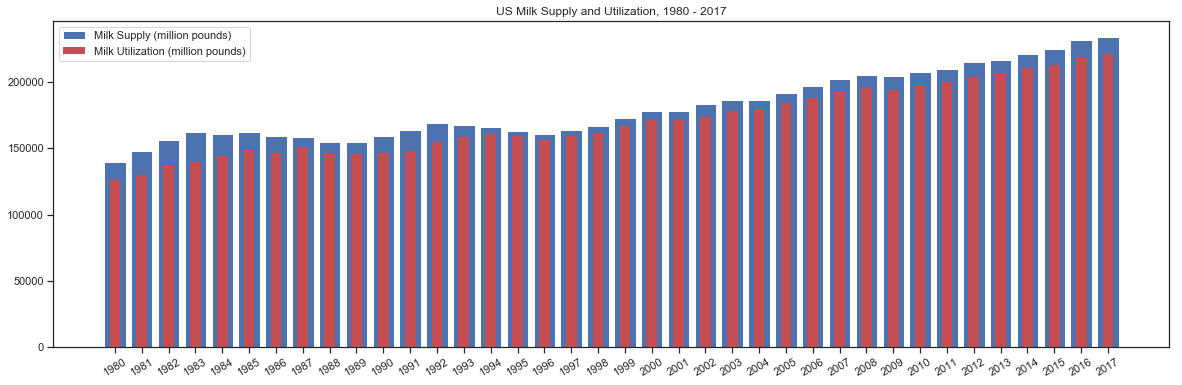

In [77]:
plt.figure(figsize=(20,6))
width = 0.8

milk_supply   = utilization_supply_milk["Milk Total Supply (million pounds)"].values
#print(milk_supply)

milk_utilization = utilization_supply_milk["Milk Total Utilization (million pounds)"].values
#print(milk_utilization)

indices = utilization_supply_milk["Year"].values
#indices = np.arange(len(milk_supply))

plt.bar(indices, milk_supply, width=width, 
        color='b', label='Milk Supply (million pounds)', align = "center")

#plt.bar([i+0.25*width for i in indices], milk_utilization, 
        #width=0.5*width, color='r', alpha=1.0, label='Milk Utilization (million pounds)', align="center", edgecolor = "none")

plt.bar(indices, milk_utilization, 
        width=0.5*width, color='r', alpha=1.0, label='Milk Utilization (million pounds)', align="center", edgecolor = "none")


#plt.xticks(indices+width/2., indices, rotation=30)
plt.xticks(indices, rotation=30)
#ax.set_xticklabels(indices, rotation=90)



plt.legend()
plt.title("US Milk Supply and Utilization, 1980 - 2017")

# Save Figure
plt.savefig("Outputs/MilkUtilization_Supply_80-17.png")

# Show Figure
plt.show()

#https://stackoverflow.com/questions/23293011/how-to-plot-a-superimposed-bar-chart-using-matplotlib-in-python

In [2]:
### ASHRAF's CODE FROM dairy_test BEGINS HERE

# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import math 
#import  statsmodels as sm 
#import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
plt.style.use('fivethirtyeight')
from plotly.plotly import plot_mpl
#from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.plotly as ply
import cufflinks as cf
#import cufflinks as cf
#import plotly
#from pyramid.arima import auto_arima

In [3]:
time_series_analysis = pd.read_csv("Resources/us_annual_milk_production_factors_80-18.csv")
time_series_analysis.apply(pd.to_numeric).head()

Year  Milk cows and heifers that have calved (thousand)  \
0  1980                                            10758.0   
1  1981                                            10849.0   
2  1982                                            10986.0   
3  1983                                            11047.0   
4  1984                                            11059.0   

   Replace-ment heifers, 500+ lbs. (thousand)  \
0                                      4159.0   
1                                      4342.0   
2                                      4547.0   
3                                      4545.0   
4                                      4533.0   

   Replace-ments per 100 cows (thousand)  \
0                                   38.7   
1                                   40.0   
2                                   41.4   
3                                   41.1   
4                                   41.0   

   Average number of milk cows in the U.S. (thousand)  Milk per cow (pounds)  \
0                                            10799.0                 11891.0   
1                                            10898.0                 12183.0   
2                                            11011.0                 12306.0   
3                                            11059.0                 12622.0   
4                                            10793.0                 12541.0   

   Milk production (million pounds)  \
0                          128406.0   
1                          132770.0   
2                          135505.0   
3                          139588.0   
4                          135351.0   

   Average price paid for milk (dollars per cwt)  \
0                                           13.0   
1                                           13.8   
2                                           13.6   
3                                           13.6   
4                                           13.5   

   Dairy ration value (dollars per cwt)  Milk-feed ratio  \
0                                  4.84             2.72   
1                                  5.04             2.76   
2                                  4.42             3.09   
3                                  5.24             2.61   
4                                  5.34             2.54   

   Milk Cow Price (dollars per head)  \
0                             1190.0   
1                             1200.0   
2                             1110.0   
3                             1030.0   
4                              895.0   

   Milk Cow Cost, Milk volume required to buy a cow (pounds)  \
0                                             9154.0           
1                                             8696.0           
2                                             8162.0           
3                                             7574.0           
4                                             6630.0           

   Alfalfa hay price received by farmers (dollars per ton)  \
0                                              72.00         
1                                              70.90         
2                                              72.73         
3                                              78.70         
4                                              79.48         

   Slaughter cow price (dollars per cwt)  
0                                  45.73  
1                                  41.93  
2                                  39.96  
3                                  39.35  
4                                  39.81

<Figure size 1440x432 with 0 Axes>

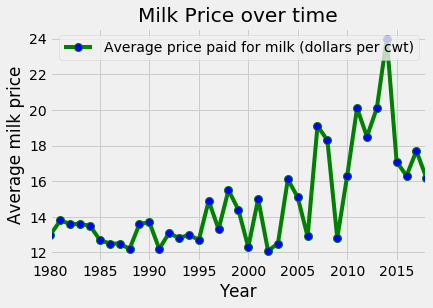

In [4]:
plt.figure(figsize=(20,6))
time_series_analysis.plot(x='Year', y='Average price paid for milk (dollars per cwt)', color="g",marker='o', markerfacecolor='blue', markersize=8, linewidth=4)
plt.title("Milk Price over time")
plt.xlabel('Year');
plt.ylabel('Average milk price');
plt.savefig("Outputs/milk_price.png")
#plt.tight_layout()

In [5]:
reduced_time_df = time_series_analysis.loc[:, ["Year", "Average price paid for milk (dollars per cwt)"]]
reduced_time_df.head()
new_red=reduced_time_df.set_index("Year")
new_red.head()
#reduced_time_df = reduced_time_df.loc[(reduced_time_df["pledged"] > 0)]
#reduced_time_df.head()

Average price paid for milk (dollars per cwt)
Year                                               
1980                                           13.0
1981                                           13.8
1982                                           13.6
1983                                           13.6
1984                                           13.5

                                            ARIMA Model Results                                            
Dep. Variable:     D.Average price paid for milk (dollars per cwt)   No. Observations:                   38
Model:                                              ARIMA(5, 1, 0)   Log Likelihood                 -71.762
Method:                                                    css-mle   S.D. of innovations              1.545
Date:                                             Mon, 08 Apr 2019   AIC                            157.524
Time:                                                     17:15:43   BIC                            168.987
Sample:                                                          1   HQIC                           161.602
                                                                                                           
                                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------

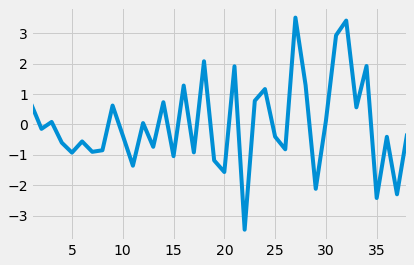

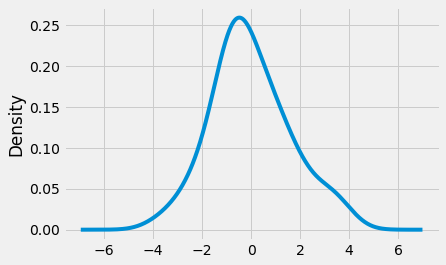

count    38.000000
mean     -0.008920
std       1.570551
min      -3.463595
25%      -0.915874
50%      -0.331254
75%       0.764733
max       3.510762
dtype: float64


In [7]:
predictions = list()
model = ARIMA(time_series_analysis['Average price paid for milk (dollars per cwt)'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals =(model_fit.resid)

# plot

residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Get forecast 500 steps ahead in future

#pred_uc = residuals.get_forecast(steps=200)

# Get confidence intervals of forecasts
#pred_ci = pred_uc.conf_int()
#residuals.plot_diagnostics(figsize=(15, 12))
#plt.show()


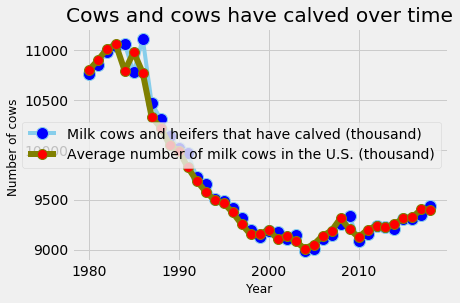

In [8]:
# multiple line plot
plt.plot( 'Year', 'Milk cows and heifers that have calved (thousand)', data=time_series_analysis, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Year', 'Average number of milk cows in the U.S. (thousand)', data=time_series_analysis, marker='o',markerfacecolor='red',markersize=10, color='olive', linewidth=6)
plt.title("Cows and cows have calved over time")
plt.xlabel('Year', fontsize=12);
plt.ylabel('Number of cows ', fontsize=12);
plt.legend()

In [9]:
milk_consumption_analysis = pd.read_csv("Resources/us_consumption_milk_75_2017.csv")
milk_consumption_analysis.apply(pd.to_numeric).head()
milk_consumption_analysis.head()

Year  Fluid milk  yogurt  Butter  American  Other  Cottage  Canned whole  \
0  1975         247    1.97    4.73      8.15   6.13     4.59          3.95   
1  1976         247    2.13    4.31      8.88   6.63     4.63          3.79   
2  1977         244    2.34    4.29      9.21   6.78     4.62          3.27   
3  1978         241    2.45    4.35      9.53   7.31     4.60          3.15   
4  1979         238    2.44    4.49      9.60   7.57     4.43          3.12   

   Bulk whole  Bulk and canned skim  Ice creamRegular  Reduced  fat  Sherbet  \
0        1.24                  3.53             18.21          6.50     1.35   
1        1.10                  3.59             17.64          6.17     1.36   
2        1.00                  3.88             17.29          6.57     1.36   
3        0.90                  3.47             17.23          6.55     1.29   
4        0.94                  3.33             16.94          6.20     1.20   

   other frozen products  dry whole milk  Nonfat dry milk  Dry butter milk  \
0                   1.82             0.1             3.26              0.2   
1                   1.68             0.2             3.50              0.2   
2                   1.63             0.2             3.31              0.3   
3                   1.51             0.3             3.10              0.2   
4                   1.41             0.3             3.28              0.2   

   Dry and  Milk equavalent milk-fat basis  
0      2.2                           539.0  
1      2.4                           540.0  
2      2.4                           540.0  
3      2.4                           544.0  
4      2.7                           548.0

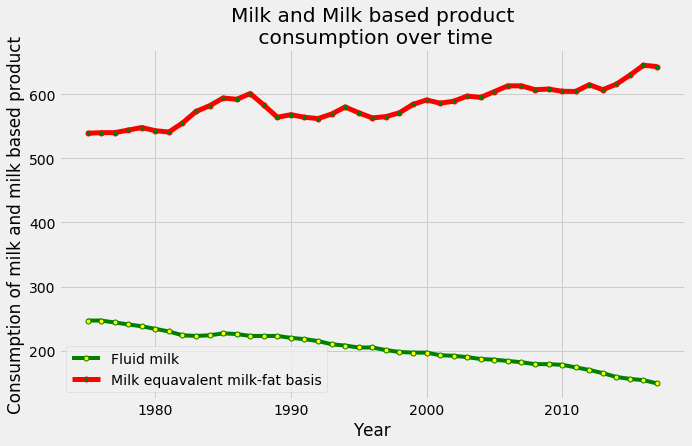

In [10]:
plt.figure(figsize=(10,6))
plt.plot( 'Year', 'Fluid milk', data=milk_consumption_analysis, marker='o', markerfacecolor='yellow', markersize=5, color='green', linewidth=4)
plt.plot( 'Year', 'Milk equavalent milk-fat basis', data=milk_consumption_analysis, marker='o',markerfacecolor='green',markersize=5, color='red', linewidth=5)
plt.title("Milk and Milk based product\n consumption over time");
plt.xlabel('Year');
plt.ylabel('Consumption of milk and milk based product');
plt.legend()
plt.savefig("Outputs/milk_dairy consumption.png")

In [11]:
#Milk and milk based product consumption over time .
#Graph shows that people used to drink more milk before 2000 which is decreasing but 
#milk based product consumption is increasing . For exaple in 1986 milk consumption was 
#226 lb per year and milk basd product was 592 lb per year but in 2017 it shows milk 
#is 149 lb wheres milk based product consumption is 643.14 pound per year.

In [13]:
#### RISHI'S CODE from Untitled1 begins here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint

# California

In [14]:
api_key = "F0060DD1-ABA0-3B8E-BD00-D08CAEE4F378"

url = "http://quickstats.nass.usda.gov/api/api_GET/?key=F0060DD1-ABA0-3B8E-BD00-D08CAEE4F378&commodity_desc=MILK&year__GE=2012&state_alpha=CA&format=JSON" 

response = requests.get(url).json()

response2 = response['data']

pprint(response2)

[{'CV (%)': '3.9',
  'Value': '1,286,869,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED',
  'domaincat_desc': 'AREA OPERATED: (1,000 TO 1,999 ACRES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION P

  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED',
  'domaincat_desc': 'AREA OPERATED: (70.0 TO 99.9 ACRES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5

  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '2.7',
  'Value': '1,501,872,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': '

  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ECONOMIC CLASS',
  'domaincat_desc': 'ECONOMIC CLASS: (10,000 TO 24,999 $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'stati

  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'FARM SALES',
  'do

  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'FARM SALES AND SALES',
  'domaincat_desc': 'FARM SALES: (250,000 TO 499,999 $) AND SALES: (50,000 OR '
                    'MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000

  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '17.3',
  'Value': '14,526,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'INVENTORY OF MILK COWS',
  'domaincat_desc': 'INVENTORY OF MILK COWS: (50 TO 99 HEAD)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS &

  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'NAICS CLASSIFICATI

  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '3.4',
  'Value': '17,214,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '10',
  'asd_desc': 'NORTHERN COAST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '015',
  'county_code': '015',
  'county_name': 'DEL NORTE',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CAL

  'country_name': 'UNITED STATES',
  'county_ansi': '079',
  'county_code': '079',
  'county_name': 'SAN LUIS OBISPO',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, CENTRAL COAST, SAN LUIS OBISPO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '3.4',
  'Value': '934,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 

  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '3.4',
  'Value': '624,834,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '51',
  'asd_desc': 'SAN JOAQUIN VALLEY',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '031',
  'county_code': '031',
  'county_name': 'KINGS',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, SAN JOAQUIN VALLEY, KINGS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticca

  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '3.4',
  'Value': '29,782,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '80',
  'asd_desc': 'SOUTHERN CALIFORNIA',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '073',
  'county_code': '073',
  'county_name': 'SAN DIEGO',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',


  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED',
  'domaincat_desc': 'AREA OPERATED: (50.0 TO 69.9 ACRES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.6',
  'Value': '279',
  'agg_level_desc': 'STATE

  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.6',
  'Value': '275',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED AND SALES',
  'domaincat_desc': 'AREA OPERATED: (500 TO 999 ACRES) AND SALES: (50,000 OR '
                    'MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',

  'county_code': '',
  'county_name': '',
  'domain_desc': 'ECONOMIC CLASS',
  'domaincat_desc': 'ECONOMIC CLASS: (250,000 TO 499,999 $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(H)',
  'Value': '10',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_des

  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(H)',
  'Value': '3',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'FARM SALES',
  'domaincat_desc': 'FARM SALES: (2,500 TO 4,999 $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'u

  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(H)',
  'Value': '22',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'INVENTORY OF MILK COWS',
 

  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'NAICS CLASSIFICATION',
  'domaincat_desc': 'NAICS CLASSIFICATION: (1113)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012'

  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '1.8',
  'Value': '1',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'NAICS CLASSIFICATION AND SALES',
  'domaincat_desc': 'NAICS CLASSIFICATION: (1125 & 1129) AND SALES: (50,000 OR '
                    'MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  're

  'county_name': 'NAPA',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, CENTRAL COAST, NAPA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '6.6',
  'Value': '1',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'CENTRAL COAST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  '

 {'CV (%)': '6.6',
  'Value': '70',
  'agg_level_desc': 'COUNTY',
  'asd_code': '51',
  'asd_desc': 'SAN JOAQUIN VALLEY',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '019',
  'county_code': '019',
  'county_name': 'FRESNO',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, SAN JOAQUIN VALLEY, FRESNO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practi

  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '6.6',
  'Value': '35',
  'agg_level_desc': 'COUNTY',
  'asd_code': '80',
  'asd_desc': 'SOUTHERN CALIFORNIA',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '065',
  'county_code': '065',
  'county_name': 'RIVERSIDE',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, SOUTHERN CALIFORNIA, RI

  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA CERTIFIED)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2016-01-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC - SALES, MEASURED IN LB',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '19.3',
  'Value': '747,333,903',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MIL

  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-01-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC - SALES IN ORGANIC MARKETS, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES IN 

  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC, MARKETING CONTRACT - SALES, MEASURED IN PCT OF '
                'ORGANIC SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'PCT OF ORGANIC SALES',
  'util_practice_desc': 'MARKETING CONTRACT',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '3.2',
  'Value': '96',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA CERTIFIED)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc':

  'location_desc': 'CALIFORNIA, CENTRAL COAST, SONOMA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '                 (D)',
  'agg_level_desc': 'COUNTY',
  'asd_code': '50',
  'asd_desc': 'SACRAMENTO VALLEY',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '007',
  'county_code': '007',
  'county_name': 'BUTTE',
  'domain_desc': 'OPERATOR

  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '107',
  'county_code': '107',
  'county_name': 'TULARE',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (ETHNICITY = HISPANIC)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, SAN JOAQUIN VALLEY, TULARE',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  

  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '5.7',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = ASIAN, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES

  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '021',
  'county_code': '021',
  'county_name': 'GLENN',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, SACRAMENTO VALLEY, GLENN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''

  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '                 (D)',
  'agg_level_desc': 'COUNTY',
  'asd_code': '51',
  'asd_desc': 'SAN JOAQUIN VALLEY',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '107',
  'county_code': '107',
  'county_name': 'TULARE',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, SAN JOAQUIN VALLEY

  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '041',
  'county_code': '041',
  'county_name': 'MARIN',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, CENTRAL COAST, MARIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '6,08

  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '                 (D)',
  'agg_level_desc': 'COUNTY',
  'asd_code': '80',
  'asd_desc': 'SOUTHERN CALIFORNIA',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '065',
  'county_code': '065',
  'county_name': 'RIVERSIDE',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, SOUTHERN CALIFORNIA, RIVERSIDE',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'sta

                    '55 TO 64)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '2.6',
  'Value': '1,388,800,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county

  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '3.4',
  'Value': '1,881,239,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL AND SALES',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, FARMING, AGE '
                    '55 TO 64) AND SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  

  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '3.1',
  'Value': '687,867,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  

  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '3.9',
  'Value': '3,072,536,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIZATION AND SALES',
  'domaincat_desc': 'ORGANIZATION: (TAX PURPOSES, PARTNERSHIP) AND SALES: '
                    '(50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_

  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '25.2',
  'Value': '820,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TYPOLOGY',
  'domaincat_desc': 'TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 150,000 $), '
                    

 {'CV (%)': '7.2',
  'Value': '918',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (2 OR MORE OPERATORS)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'w

  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '11',
  'agg_level_desc': 'COUNTY',
  'asd_code': '51',
  'asd_desc': 'SAN JOAQUIN VALLEY',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '077',
  'county_code': '077',
  'county_name': 'SAN JOAQUIN',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (ETHNICITY = HISPANIC)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, SAN JOAQUIN VALLEY, SAN JOAQUIN',
  'prodn_pra

  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '099',
  'county_code': '099',
  'county_name': 'STANISLAUS',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = ASIAN, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, SAN JOAQUIN VALLEY, STANISLAUS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV

  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '5',
  'agg_level_desc': 'COUNTY',
  'asd_code': '50',
  'asd_desc': 'SACRAMENTO VALLEY',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '007',
  'county_code': '007',
  'county_name': 'BUTTE',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, SACRAMENTO VALLEY, BUTTE',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTIC

  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '047',
  'county_code': '047',
  'county_name': 'MERCED',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, SAN JOAQUIN VALLEY, MERCED',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '

  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '5.9',
  'Value': '900',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS AND SALES',
  'domaincat_desc': 'OPERATORS: (2 OR MORE OPERATORS) AND SALES: (50,000 OR '
                    'MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'r

  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA, SAN JOAQUIN VALLEY, STANISLAUS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '2',
  'agg_level_desc': 'COUNTY',
  'asd_code': '51',
  'asd_desc': 'SAN JOAQUIN VALLEY',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'co

  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '10.2',
  'Value': '179',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, FARMING, AGE '
                    '35 TO 44)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_

  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '10.2',
  'Value': '179',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',

  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '9.3',
  'Value': '8',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIZATION',
  'domaincat_desc': 'ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXCL FAMILY '
                    'HELD))',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',

  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '7.2',
  'Value': '787',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANI

  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TYPOLOGY',
  'domaincat_desc': 'TYPOLOGY: (FAMILY FARMS, GCFI (150,000 TO 349,999 $), '
                    'PRIMARY OCCUPATION, FARMING)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc'

  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '26.5',
  'Value': '8',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TYPOLOGY AND SALES',
  'domaincat_desc': 'TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 350,000 $), '
      

  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '04',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-06-28 15:08:24',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.77',
  'agg_level_desc': 'STATE',
 

  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.82',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '04',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-05-30 15:00:03',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  's

  'load_time': '2018-04-27 15:07:08',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.73',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 

  'begin_code': '03',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '03',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:03:23',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': 

  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.7',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '03',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '03',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-29 15:12:51',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha'

  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-30 15:00:23',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'FEB',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.74',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '03',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name':

  'asd_code': '',
  'asd_desc': '',
  'begin_code': '02',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '02',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-04-30 15:10:28',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'FEB',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': 

  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'GROSS INCOME',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '6,293,826,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:16:36',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - G

  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:16:36',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - MILKFAT, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'MILKFAT',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,566,500,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATE

  'Value': '14.75',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '02',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '02',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-28 15:00:51',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'FEB',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code'

  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '17.08',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '02',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '02',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-27 15:07:08',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'FEB',
  'region_desc': '',
  'sector_desc': 'A

  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '01',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-27 15:07:08',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '14.33',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '02',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code'

 {'CV (%)': '',
  'Value': '15.31',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '01',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:03:23',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  

  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '22.22',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '01',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-29 15:12:51',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTI

  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-30 15:27:36',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MARKETING YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '17.92',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 

  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-04-30 15:10:28',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '15.12',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commod

  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,512,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '01',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-19 15:00:21',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UT

  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,303,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '08',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '08',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTIC

  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR THRU JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,515,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  

  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '10,336,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '03',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-02-21 15:00:52',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN THRU MAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION

  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT THRU DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,215,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '11',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '11',
  'freq_desc':

  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-02-21 15:00:54',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL THRU SEP',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,339,000,000',
  'agg_lev

  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '10,979,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-02-19 15:24:38',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR THRU JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'sta

  'load_time': '2015-02-20 15:44:20',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '10,369,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domai

  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-21 15:00:43',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT THRU DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Valu

  'begin_code': '12',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-09-04 15:46:13',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)'

  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,915',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY

  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'SEP',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,870',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',

  'asd_code': '',
  'asd_desc': '',
  'begin_code': '09',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-02-21 15:00:52',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'SEP',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending'

  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,790',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '09',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-02-21 15:00:54',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'SEP',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRO

  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '08',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-02-19 15:24:38',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'AUG',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,850',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '09',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': '

  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '05',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-09-04 15:46:13',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAY',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,975',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '06',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '

  'Value': '6,899,743,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2014-10-29 15:18:36',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'water

  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'FARM USE',
  'unit_desc': 'LB',
  'util_practice_desc': 'FEED',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '660,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-26 15:16:24',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIM

  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '01',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-04-03 15:00:32',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, DRY, NONFAT, HUMAN - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2019',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '61,538,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '02',
  'class_desc': 'DRY, NONFAT, HUMAN',
  'commodity_desc': 'MILK',
  'congr_

  'zip_5': ''},
 {'CV (%)': '',
  'Value': '37,524,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '12',
  'class_desc': 'DRY, NONFAT, HUMAN',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-14 15:00:40',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, DRY, NONFAT, HUMAN - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': '

  'short_desc': 'MILK, DRY, NONFAT, HUMAN - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '55,900,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '12',
  'class_desc': 'DRY, NONFAT, HUMAN',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-26 15:06:25',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc':

  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '11',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-26 15:06:25',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'NOV',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, DRY, NONFAT, HUMAN - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '53,415,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '12',
  'class_desc': 'DRY, NONFAT, HUM

  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '47,909,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '11',
  'class_desc': 'DRY, NONFAT, HUMAN',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '11',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:06:54',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'NOV',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, DRY, NONFAT, HUMAN - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util

  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, DRY, NONFAT, HUMAN - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '61,145,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '11',
  'class_desc': 'DRY, NONFAT, HUMAN',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '11',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-28 15:12:29

  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-29 15:00:17',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, DRY, NONFAT, HUMAN - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '35,558,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc'

  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '38,491,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'DRY, NONFAT, HUMAN',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2013-05-30 08:46:43',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, DRY, NONFAT, HUMAN - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc

  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, FLUID GRADE - SALES, MEASURED IN PCT BY TYPE',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'PCT BY TYPE',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '99',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'FLUID GRADE',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc

  'asd_code': '',
  'asd_desc': '',
  'begin_code': '08',
  'class_desc': 'SKIM, UNSWEETENED, CONDENSED',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '08',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-26 15:06:25',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'AUG',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, SKIM, UNSWEETENED, CONDENSED, BULK - PRODUCTION, '
                'MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'BULK',
  'watershed_code': '00000000',
  

  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, SKIM, UNSWEETENED, CONDENSED, BULK - PRODUCTION, '
                'MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'BULK',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '38,019,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '08',
  'class_desc': 'SKIM, UNSWEETENED, CONDENSED',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '08',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_tim

  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'SKIM, UNSWEETENED, CONDENSED',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '07',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:06:54',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, SKIM, UNSWEETENED, CONDENSED, BULK - PRODUCTION, '
                'MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'BULK',
  'wa

  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, SKIM, UNSWEETENED, CONDENSED, BULK - PRODUCTION, '
                'MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'BULK',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '47,697,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'SKIM, UNSWEETENED, CONDENSED',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '07',
  'freq_desc': 'MONTHLY',
  

  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '06',
  'class_desc': 'SKIM, UNSWEETENED, CONDENSED',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-29 15:00:17',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, SKIM, UNSWEETENED, CONDENSED, BULK - PRODUCTION, '
                'MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'BULK',
  'wa

  'reference_period_desc': 'MAY',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, SKIM, UNSWEETENED, CONDENSED, BULK - PRODUCTION, '
                'MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'BULK',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '45,555,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '06',
  'class_desc': 'SKIM, UNSWEETENED, CONDENSED',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  

  'Value': '11',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'SKIM, UNSWEETENED, CONDENSED',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-29 15:00:17',
  'location_desc': 'CALIFORNIA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, SKIM, UNSWEETENED, CONDENSED, BULK - PRODUCTION, '
                'MEASURED IN PLANTS',
  'source_desc': 'SURVEY',
  'state_alpha': 'CA',
  'state_ansi': '06',
  'state_fips_code': '06',
  'state_name': 'CALIFORNIA',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'PLANTS',
  'util_prac

In [16]:
milk_data_CA = pd.DataFrame(response2)
milk_data_CA.head()

CV (%)          Value agg_level_desc asd_code asd_desc begin_code  \
0    3.9  1,286,869,000          STATE                           00   
1    6.6     42,500,000          STATE                           00   
2    4.7    350,425,000          STATE                           00   
3    5.9    544,294,000          STATE                           00   
4    5.2    406,492,000          STATE                           00   

    class_desc commodity_desc congr_district_code country_code  ...  \
0  ALL CLASSES           MILK                             9000  ...   
1  ALL CLASSES           MILK                             9000  ...   
2  ALL CLASSES           MILK                             9000  ...   
3  ALL CLASSES           MILK                             9000  ...   
4  ALL CLASSES           MILK                             9000  ...   

  state_fips_code  state_name statisticcat_desc unit_desc  \
0              06  CALIFORNIA             SALES         $   
1              06  CALIFORNIA             SALES         $   
2              06  CALIFORNIA             SALES         $   
3              06  CALIFORNIA             SALES         $   
4              06  CALIFORNIA             SALES         $   

          util_practice_desc watershed_code watershed_desc week_ending  year  \
0  ALL UTILIZATION PRACTICES       00000000                             2012   
1  ALL UTILIZATION PRACTICES       00000000                             2012   
2  ALL UTILIZATION PRACTICES       00000000                             2012   
3  ALL UTILIZATION PRACTICES       00000000                             2012   
4  ALL UTILIZATION PRACTICES       00000000                             2012   

  zip_5  
0        
1        
2        
3        
4        

[5 rows x 39 columns]

In [17]:
milk_data_CA = milk_data_CA[['year', 'Value', 'unit_desc', 'statisticcat_desc']]
milk_data_CA

milk_data_CA = milk_data_CA[milk_data_CA['unit_desc'] == '$']
milk_data_CA = milk_data_CA[milk_data_CA['statisticcat_desc'] == 'GROSS INCOME']

milk_data_CA.head()

year          Value unit_desc statisticcat_desc
708  2017  6,562,380,000         $      GROSS INCOME
709  2016  6,066,300,000         $      GROSS INCOME
710  2015  6,293,826,000         $      GROSS INCOME
711  2014  9,358,972,000         $      GROSS INCOME
712  2013  7,618,565,000         $      GROSS INCOME

# WISCONSIN

In [18]:
url2 = "http://quickstats.nass.usda.gov/api/api_GET/?key=F0060DD1-ABA0-3B8E-BD00-D08CAEE4F378&commodity_desc=MILK&year__GE=2012&state_alpha=WI&format=JSON" 

response3 = requests.get(url2).json()

response4 = response3['data']

pprint(response4)

[{'CV (%)': '2.4',
  'Value': '966,994,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED',
  'domaincat_desc': 'AREA OPERATED: (1,000 TO 1,999 ACRES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACT

  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED',
  'domaincat_desc': 'AREA OPERATED: (70.0 TO 99.9 ACRES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '2.4',
  'Value': '966,903,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  

  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '3.4',
  'Value': '193,696,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED AND SALES',
  'domaincat_desc': 'AREA OPERATED: (220 

  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ECONOMIC CLASS',
  'domaincat_desc': 'ECONOMIC CLASS: (10,000 TO 24,999 $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'wat

  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '70.7',
  'Value': '1,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'FARM SALES',
  'domaincat_desc': 'FARM SALES: (1,000 TO 2,499 $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRAC

  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'FARM SALES AND SALES',
  'domaincat_desc': 'FARM SALES: (250,000 TO 499,999 $) AND SALES: (50,000 OR '
                    'MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc

  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '2.9',
  'Value': '917,497,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'INVENTORY OF MILK COWS',
  'domaincat_desc': 'INVENTORY OF MILK COWS: (50 TO 99 HEAD)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'stati

  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '23.8',
  'Value': '3,223,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'NAICS CLASSIFICATION',
  'domaincat_desc': 'NAICS CLASSIFICATION: (1125 & 1129)',
  'end_code': '00'

  'asd_code': '10',
  'asd_desc': 'NORTHWEST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '007',
  'county_code': '007',
  'county_name': 'BAYFIELD',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, NORTHWEST, BAYFIELD',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '

  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '5.1',
  'Value': '18,369,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '20',
  'asd_desc': 'NORTH CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '099',
  'county_code': '099',
  'county_name': 'PRICE',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, NORTH CENTRAL, PRICE',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  

  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, WEST CENTRAL, LA CROSSE',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '5.1',
  'Value': '87,090,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'WEST CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',

  'Value': '62,014,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '50',
  'asd_desc': 'CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '141',
  'county_code': '141',
  'county_name': 'WOOD',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, CENTRAL, WOOD',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watersh

  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '5.1',
  'Value': '113,240,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '70',
  'asd_desc': 'SOUTHWEST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '065',
  'county_code': '065',
  'county_name': 'LAFAYETTE',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, SOUTHWEST, LAFAYETTE',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',

  'county_name': 'RACINE',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, SOUTHEAST, RACINE',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '5.1',
  'Value': '54,906,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '90',
  'asd_desc': 'SOUTHEAST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_d

  'zip_5': ''},
 {'CV (%)': '3.1',
  'Value': '3,480',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED',
  'domaincat_desc': 'AREA OPERATED: (260 TO 499 ACRES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL U

  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '10.1',
  'Value': '102',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED AND SALES',
  'domaincat_desc': 'AREA OPERATED: (5

  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ECONOMIC CLASS',
  'domaincat_desc': 'ECONOMIC CLASS: (25,000 TO 49,999 $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
 

  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '2.6',
  'Value': '3,876',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'FARM SALES',
  'domaincat_desc': 'FARM SALES: (100,000 TO 249,999 $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 

  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'INVENTORY OF MILK COWS',
  'domaincat_desc': 'INVENTORY OF MILK COWS: (0 HEAD)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '2.9',
  'Value': '11,063',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_

  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '16.3',
  'Value': '13',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'NAICS CLASSIFICATION',
  'domaincat_desc': 'NAICS CLASSIFICATION: (1112)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPER

  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '9.2',
  'Value': '137',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'NAICS CLASSIFICATION AND SALES',
  'domaincat_desc': 'NAICS CLASSIFICATION: (1119) AND SALES: (50

  'asd_desc': 'NORTHWEST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '031',
  'county_code': '031',
  'county_name': 'DOUGLAS',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, NORTHWEST, DOUGLAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_e

  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.7',
  'Value': '2',
  'agg_level_desc': 'COUNTY',
  'asd_code': '30',
  'asd_desc': 'NORTHEAST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '041',
  'county_code': '041',
  'county_name': 'FOREST',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, NORTHEAST, FOREST',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'M

  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, WEST CENTRAL, PIERCE',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.7',
  'Value': '160',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'WEST CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
 

  'agg_level_desc': 'COUNTY',
  'asd_code': '60',
  'asd_desc': 'EAST CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '029',
  'county_code': '029',
  'county_name': 'DOOR',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, EAST CENTRAL, DOOR',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_co

  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.7',
  'Value': '433',
  'agg_level_desc': 'COUNTY',
  'asd_code': '70',
  'asd_desc': 'SOUTHWEST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '123',
  'county_code': '123',
  'county_name': 'VERNON',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, SOUTHWEST, VERNON',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sec

  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, SOUTHEAST, WAUKESHA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '2.9',
  'Value': '11,295',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_c

 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA EXEMPT)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-01-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC - SALES, MEASURED IN LB',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACT

  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES IN ORGANIC MARKETS',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA CERTIFIED)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-01-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ORGANIC',
  'reference_

  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-01-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC, MARKETING CONTRACT - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'MARKETING CONTRACT',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '7.1',
  'Value': '390',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'co

  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'GOAT',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA EXEMPT)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-01-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, GOAT, ORGANIC - SALES, MEASURED IN LB',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'LB',
  'util_pract

  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, GOAT, ORGANIC - SALES IN ORGANIC MARKETS, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES IN ORGANIC MARKETS',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '(H)',
  'Value': '79,500',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'GOAT',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGAN

  'asd_desc': 'SOUTH CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '025',
  'county_code': '025',
  'county_name': 'DANE',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (ETHNICITY = HISPANIC)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, SOUTH CENTRAL, DANE',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',

  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '544,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '10',
  'asd_desc': 'NORTHWEST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '129',
  'county_code': '129',
  'county_name': 'WASHBURN',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, NORTHWEST, WASHBURN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',

  'county_name': 'LA CROSSE',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, WEST CENTRAL, LA CROSSE',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '3,231,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'WEST CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CL

 {'CV (%)': '(L)',
  'Value': '643,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '60',
  'asd_desc': 'EAST CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '029',
  'county_code': '029',
  'county_name': 'DOOR',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, EAST CENTRAL, DOOR',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  

  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '1,864,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '70',
  'asd_desc': 'SOUTHWEST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '123',
  'county_code': '123',
  'county_name': 'VERNON',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, 

  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '6.2',
  'Value': '190,937,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES

  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '5.0',
  'Value': '577,033,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, FARMING, AGE '
                    'GE 65)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED 

  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL AND SALES',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, FARMING, AGE '
                    '45 TO 54) AND SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '1.5',
  'Value': '1,461,516,000',
  'agg_level_desc': 'STATE',
  'asd_code': ''

  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '1.7',
  'Value': '1,045,403,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIZATION',
  'domaincat_desc': 'ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMILY HELD)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  '

  'county_name': '',
  'domain_desc': 'ORGANIZATION AND SALES',
  'domaincat_desc': 'ORGANIZATION: (TAX PURPOSES, INSTITUTIONAL & RESEARCH & '
                    'RESERVATION & OTHER) AND SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '2.1',
  'Value': '1,276,026,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': ''

  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '3.9',
  'Value': '914,527,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TYPOLOGY',
  'domaincat_desc': 'TYPOLOGY: (FAMILY FARMS, GCFI (5,000,000 OR MORE $))',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_

  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '2.6',
  'Value': '6,826',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',


 {'CV (%)': '(D)',
  'Value': '2',
  'agg_level_desc': 'COUNTY',
  'asd_code': '10',
  'asd_desc': 'NORTHWEST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '095',
  'county_code': '095',
  'county_name': 'POLK',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, NORTHWEST, POLK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'u

  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '6',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'WEST CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '053',
  'county_code': '053',
  'county_name': 'JACKSON',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, WEST CENTRAL, JACKSON',
  'prodn_practice_

  'county_code': '009',
  'county_name': 'BROWN',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, EAST CENTRAL, BROWN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '3',
  'agg_level_desc': 'COUNTY',
  'asd_code': '60',
  'asd_desc': 'EAST CENTRAL',
  'begin_code': '00',
  'cl

  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '7',
  'agg_level_desc': 'COUNTY',
  'asd_code': '70',
  'asd_desc': 'SOUTHWEST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '103',
  'county_code': '103',
  'county_name': 'RICHLAND',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN, SOUTHWEST, RICHLAND',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_d

  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '2',
  'agg_level_desc': 'COUNTY',
  'asd_code': '90',
  'asd_desc': 'SOUTHEAST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '133',
  'county_code': '133',
  'county_name': 'WAUKESHA',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00

  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, FARMING, AGE '
                    '45 TO 54)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week

  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '3.5',
  'Value': '1,312',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL AND SALES',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, FARMING, AGE '
                    '35 TO 44) AND SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY'

  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIZATION',
  'domaincat_desc': 'ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXCL FAMILY '
                    'HELD))',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': ''

  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '2.9',
  'Value': '8,001',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIZATION AND SALES',
  'domaincat_desc': 'ORGANIZATION: (TAX PURPOSES, FAMILY & INDIVIDUAL) AND '
                    'SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'A

  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TYPOLOGY',
  'domaincat_desc': 'TYPOLOGY: (FAMILY FARMS, GCFI (150,000 TO 349,999 $), '
                    'PRIMARY OCCUPATION, FARMING)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '2.2',
  'Value': '2,895',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_des

  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '11.4',
  'Value': '275',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TYPOLOGY AND SALES',
  'domaincat_desc': 'TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 350,000 $), '
                    'RETIREMENT) AND SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
 

  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '04',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-06-28 15:08:24',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.82',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '05',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  '

  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '04',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-05-30 15:00:03',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'w

  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.8',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '04',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-27 15:07:08',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODU

  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '03',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:03:23',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.76',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_n

 {'CV (%)': '',
  'Value': '3.81',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '03',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '03',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-29 15:12:51',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '0000

  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.84',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '03',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '03',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-30 15:00:23',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAR',
  'region_desc': '',
  'se

  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '02',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-04-30 15:10:28',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'FEB',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.74',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '03',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': 

  'zip_5': ''},
 {'CV (%)': '',
  'Value': '5,123,908,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:16:36',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - GROSS INCOME, MEASURED IN $',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'GROSS INCOME',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICE

  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - MILKFAT, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'MILKFAT',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,050,700,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-28 15:31:46',
  'location_desc': 'WISCONSIN',
  'prodn_practice_

  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '02',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-28 15:00:51',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'FEB',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '16.2',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '03',
  'class

  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '19',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '02',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '02',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-27 15:07:08',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'FEB',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'ut

  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '16.1',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '02',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '02',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2

  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '01',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:03:23',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '17.6',
  'agg_level_desc': 'STATE',
  'asd_code

  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '05',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-29 15:12:51',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAY',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '23.2',
  'agg_level_desc': 'STATE',
  'asd_code

  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MARKETING YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '20.5',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPEC

  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2014-10-29 15:27:20',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MARKETING YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '19.5',
  

  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '5,487,920,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-26 15:16:24',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN $',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi'

  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,529,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domainca

  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': 

  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,548,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  's

  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-02-21 15:00:52',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,569,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'coun

  'asd_code': '',
  'asd_desc': '',
  'begin_code': '03',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '03',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-02-21 15:00:54',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': 

  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '27,795,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-28 15:31:46',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRO

  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-02-19 15:24:38',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'SEP',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,340,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED S

  'Value': '2,302,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '06',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-02-20 15:44:20',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000'

  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,329,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '03',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '03',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-09-04 15:46:13',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAR',
  'region_desc': '',
  'sector_desc': 'ANIM

  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-09-04 15:46:13',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,060',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_cod

 {'CV (%)': '',
  'Value': '1,995',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'water

  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,995',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRA

  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-02-21 15:00:52',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'SEP',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,950',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr

  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,845',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '09',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-02-21 15:00:54',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'SEP',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'AL

  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,800',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '09',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-02-19 15:24:38',
  'location_desc': 'WISCONSIN',
  'pr

  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-02-20 15:44:20',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '21,436',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_d

  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,850',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '12',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-09-04 15:46:13',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'uti

  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '230,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-26 15:16:24',


  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-26 15:16:24',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, HOME CONSUMPTION - FARM USE, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '55',
  'state_fips_code': '55',
  'state_name': 'WISCONSIN',
  'statisticcat_desc': 'FARM USE',
  'unit_desc': 'LB',
  'util_practice_desc': 'HOME CONSUMPTION',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '16,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',


  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '                (NA)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'MANUFACTURING GRADE',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2014-10-29 15:27:20',
  'location_desc': 'WISCONSIN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MARKETING YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, MANUFACTURING GRADE - PRICE RECEIVED, MEASURED IN $ / '
                'CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'WI',
  'state_ansi': '5

In [19]:
milk_data_WI = pd.DataFrame(response4)
milk_data_WI.head()

CV (%)        Value agg_level_desc asd_code asd_desc begin_code  \
0    2.4  966,994,000          STATE                           00   
1    3.2   24,204,000          STATE                           00   
2    8.1   90,162,000          STATE                           00   
3    2.1  145,143,000          STATE                           00   
4    2.2  160,998,000          STATE                           00   

    class_desc commodity_desc congr_district_code country_code  ...  \
0  ALL CLASSES           MILK                             9000  ...   
1  ALL CLASSES           MILK                             9000  ...   
2  ALL CLASSES           MILK                             9000  ...   
3  ALL CLASSES           MILK                             9000  ...   
4  ALL CLASSES           MILK                             9000  ...   

  state_fips_code state_name statisticcat_desc unit_desc  \
0              55  WISCONSIN             SALES         $   
1              55  WISCONSIN             SALES         $   
2              55  WISCONSIN             SALES         $   
3              55  WISCONSIN             SALES         $   
4              55  WISCONSIN             SALES         $   

          util_practice_desc watershed_code watershed_desc week_ending  year  \
0  ALL UTILIZATION PRACTICES       00000000                             2012   
1  ALL UTILIZATION PRACTICES       00000000                             2012   
2  ALL UTILIZATION PRACTICES       00000000                             2012   
3  ALL UTILIZATION PRACTICES       00000000                             2012   
4  ALL UTILIZATION PRACTICES       00000000                             2012   

  zip_5  
0        
1        
2        
3        
4        

[5 rows x 39 columns]

In [20]:
milk_data_WI = milk_data_WI[['year', 'Value', 'unit_desc', 'statisticcat_desc']]
milk_data_WI

milk_data_WI = milk_data_WI[milk_data_WI['unit_desc'] == '$']
milk_data_WI = milk_data_WI[milk_data_WI['statisticcat_desc'] == 'GROSS INCOME']

milk_data_WI.head()

year          Value unit_desc statisticcat_desc
772  2017  5,446,290,000         $      GROSS INCOME
773  2016  5,017,488,000         $      GROSS INCOME
774  2015  5,123,908,000         $      GROSS INCOME
775  2014  6,749,015,000         $      GROSS INCOME
776  2013  5,545,351,000         $      GROSS INCOME

# IDAHO

In [21]:
url3 = "http://quickstats.nass.usda.gov/api/api_GET/?key=F0060DD1-ABA0-3B8E-BD00-D08CAEE4F378&commodity_desc=MILK&year__GE=2013&state_alpha=ID&format=JSON"

response5 = requests.get(url3).json()

response6 = response5['data']

pprint(response6)

[{'CV (%)': '34.2',
  'Value': '34,305,825',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-01-31 00:00:00',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',


  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-01-31 00:00:00',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC - OPERATIONS WITH SALES IN ORGANIC MARKETS',
  'source_desc': 'CENSUS',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'SALES IN ORGANIC MARKETS',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '14.6',
  'Value': '17',
  'agg_level_desc': 'STA

  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '2.8',
  'Value': '100',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-01-31 00:00:00',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC, MARKETING CONTRACT - SALES, MEASURED IN PCT OF '
                'ORGANIC SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'ID',
  'state_ansi': '1

  'load_time': '2018-06-28 15:08:24',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.84',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '05',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECI

  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '04',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-05-30 15:00:03',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Val

  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.82',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '04',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-27 15:07:08',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'I

  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:03:23',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.77',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'do

  'asd_code': '',
  'asd_desc': '',
  'begin_code': '03',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '03',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-29 15:12:51',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  

  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.8',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '03',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '03',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-30 15:00:23',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN P

  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:16:36',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - GROSS INCOME, MEASURED IN $',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'GROSS INCOME',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,197,733,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES'

  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-26 15:16:24',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - MILKFAT, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'MILKFAT',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  

  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '14.9',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '07',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-09-27 15:06:18',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PR

  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-07-30 15:00:12',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '16.5',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',


 {'CV (%)': '',
  'Value': '14.6',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '06',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-27 15:07:08',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_

  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '16.7',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '06',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:03:23',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  '

  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '05',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-29 15:12:51',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAY',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '22.5',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '06',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_dist

  'zip_5': ''},
 {'CV (%)': '',
  'Value': '19.1',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '05',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '05',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-30 15:00:23',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAY',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES

  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN $',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,279,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '01',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-19 15:00:21',
  'location_desc': 'IDAHO',
  'prodn_practice_des

  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL THRU SEP',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,324,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '08',
  'class_desc': 

  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,726,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR THRU JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_pra

  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,530,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '03',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-02-21 15:

  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-20 15:01:49',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT THRU DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,180,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
 

  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,624,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-02-21 15:00:54',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL THRU SEP',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticc

  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,533,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',


  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAY',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,156,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '06',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',


  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,170',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '08',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_

  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '07',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV 

  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,165',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '07',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-02-21 15:00:52',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  

  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-02-21 15:00:54',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,095',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county

  'asd_code': '',
  'asd_desc': '',
  'begin_code': '06',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-02-19 15:24:38',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'y

  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,950',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-02-20 15:44:20',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, M

  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-30 15:18:53',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '31,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ans

  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:16:36',
  'location_desc': 'IDAHO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, HOME CONSUMPTION - FARM USE, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'ID',
  'state_ansi': '16',
  'state_fips_code': '16',
  'state_name': 'IDAHO',
  'statisticcat_desc': 'FARM USE',
  'unit_desc': 'LB',
  'util_practice_desc': 'HOME CONSUMPTION',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'we

In [22]:
milk_data_ID = pd.DataFrame(response4)
milk_data_ID.head()

CV (%)        Value agg_level_desc asd_code asd_desc begin_code  \
0    2.4  966,994,000          STATE                           00   
1    3.2   24,204,000          STATE                           00   
2    8.1   90,162,000          STATE                           00   
3    2.1  145,143,000          STATE                           00   
4    2.2  160,998,000          STATE                           00   

    class_desc commodity_desc congr_district_code country_code  ...  \
0  ALL CLASSES           MILK                             9000  ...   
1  ALL CLASSES           MILK                             9000  ...   
2  ALL CLASSES           MILK                             9000  ...   
3  ALL CLASSES           MILK                             9000  ...   
4  ALL CLASSES           MILK                             9000  ...   

  state_fips_code state_name statisticcat_desc unit_desc  \
0              55  WISCONSIN             SALES         $   
1              55  WISCONSIN             SALES         $   
2              55  WISCONSIN             SALES         $   
3              55  WISCONSIN             SALES         $   
4              55  WISCONSIN             SALES         $   

          util_practice_desc watershed_code watershed_desc week_ending  year  \
0  ALL UTILIZATION PRACTICES       00000000                             2012   
1  ALL UTILIZATION PRACTICES       00000000                             2012   
2  ALL UTILIZATION PRACTICES       00000000                             2012   
3  ALL UTILIZATION PRACTICES       00000000                             2012   
4  ALL UTILIZATION PRACTICES       00000000                             2012   

  zip_5  
0        
1        
2        
3        
4        

[5 rows x 39 columns]

In [23]:
milk_data_ID = milk_data_ID[['year', 'Value', 'unit_desc', 'statisticcat_desc']]
milk_data_ID

milk_data_ID = milk_data_ID[milk_data_ID['unit_desc'] == '$']
milk_data_ID = milk_data_ID[milk_data_ID['statisticcat_desc'] == 'GROSS INCOME']

milk_data_ID

year          Value unit_desc statisticcat_desc
772  2017  5,446,290,000         $      GROSS INCOME
773  2016  5,017,488,000         $      GROSS INCOME
774  2015  5,123,908,000         $      GROSS INCOME
775  2014  6,749,015,000         $      GROSS INCOME
776  2013  5,545,351,000         $      GROSS INCOME
777  2012  5,232,956,000         $      GROSS INCOME

# NEW YORK

In [24]:
url4 = "http://quickstats.nass.usda.gov/api/api_GET/?key=F0060DD1-ABA0-3B8E-BD00-D08CAEE4F378&commodity_desc=MILK&year__GE=2012&state_alpha=NY&format=JSON"

response7 = requests.get(url4).json()

response8 = response7['data']

pprint(response8)

[{'CV (%)': '2.4',
  'Value': '497,261,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED',
  'domaincat_desc': 'AREA OPERATED: (1,000 TO 1,999 ACRES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTIC

 {'CV (%)': '10.6',
  'Value': '60,275,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED AND SALES',
  'domaincat_desc': 'AREA OPERATED: (180 TO 219 ACRES) AND SALES: (50,000 OR '
                    'MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_d

  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '22.9',
  'Value': '538,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ECONOMIC CLASS',
  'domaincat_desc': 'ECONOMIC CLASS: (10,000 TO 24,999 $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',


  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '17.9',
  'Value': '41,515,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',


 {'CV (%)': '16.8',
  'Value': '19,552,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'INVENTORY OF MILK COWS',
  'domaincat_desc': 'INVENTORY OF MILK COWS: (10 TO 19 HEAD)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZAT

  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'NAICS CLASSIFICATION',
  'domaincat_desc': 'NAICS CLASSIFICATION: (112111)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_peri

  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'SALES',
  'domaincat_desc': 'SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.6',
  'Value': '121,480,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '20',


  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.6',
  'Value': '85,893,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'WESTERN',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '069',
  'county_code': '069',
  'county_name': 'ONTARIO',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK, WESTERN, ONTARIO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_

  'location_desc': 'NEW YORK, CENTRAL, ONONDAGA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.6',
  'Value': '7,252,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '50',
  'asd_desc': 'CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '075',
  'county_code': '075',
  'county_name': 'OSWEGO',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'N

  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '013',
  'county_code': '013',
  'county_name': 'CHAUTAUQUA',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK, SOUTHWEST, CHAUTAUQUA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)

  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.6',
  'Value': '1,390,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '90',
  'asd_desc': 'SOUTHEAST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '111',
  'county_code': '111',
  'county_name': 'ULSTER',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK, SOUTHEAST, ULSTER',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'stat

  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '7.0',
  'Value': '850',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA

 {'CV (%)': '6.9',
  'Value': '834',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED AND SALES',
  'domaincat_desc': 'AREA OPERATED: (500 TO 999 ACRES) AND SALES: (50,000 OR '
                    'MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '

  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '18.5',
  'Value': '643',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ECONOMIC CLASS',
  'domaincat_desc': 'ECONOMIC CLASS: (50,000 TO 99,999 $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  '

  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'FARM SALES',
  'domaincat_desc': 'FARM SALES: (250,000 TO 499,999 $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': 

  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '2.9',
  'Value': '91',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'INVENTORY OF MILK COWS',
  'domaincat_desc': 'INVENTORY OF MILK COWS: (1,000 TO 2,499 HEAD)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS

  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '22.5',
  'Value': '80',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': ''

  'zip_5': ''},
 {'CV (%)': '23.7',
  'Value': '4',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'NAICS CLASSIFICATION AND SALES',
  'domaincat_desc': 'NAICS CLASSIFICATION: (1125 & 1129) AND SALES: (50,000 OR '
                    'MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': '

  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '11.1',
  'Value': '24',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'WESTERN',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '063',
  'county_code': '063',
  'county_name': 'NIAGARA',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK, W

  'country_name': 'UNITED STATES',
  'county_ansi': '065',
  'county_code': '065',
  'county_name': 'ONEIDA',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK, CENTRAL, ONEIDA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '11.1',
  'Value': '65',
  'agg_level_desc': 'COUNTY',
  'asd_code': '50',
  'asd_desc': 'CENTRAL',
  'begin_co

  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '11.1',
  'Value': '173',
  'agg_level_desc': 'COUNTY',
  'asd_code': '70',
  'asd_desc': 'SOUTHWEST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '009',
  'county_code': '009',
  'county_name': 'CATTARAUGUS',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK, SOUTHWEST, CATTARAUGUS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES'

  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '11.1',
  'Value': '26',
  'agg_level_desc': 'COUNTY',
  'asd_code': '90',
  'asd_desc': 'SOUTHEAST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '105',
  'county_code': '105',
  'county_name': 'SULLIVAN',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_ti

  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA CERTIFIED)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-01-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC - SALES, MEASURED IN LB',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '12.9',
  'Value': '292,126,335',
  'agg_level_desc': 'STATE',
  'asd

  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '13.2',
  'Value': '93,611,066',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA CERTIFIED)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-01-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC - SALES IN ORGANIC MARKETS, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'sta

  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC, MARKETING CONTRACT - SALES, MEASURED IN PCT OF '
                'ORGANIC SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'PCT OF ORGANIC SALES',
  'util_practice_desc': 'MARKETING CONTRACT',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'GOAT',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGAN

  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = ASIAN, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_endi

  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '436,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'WESTERN',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '069',
  'county_code': '069',
  'county_name': 'ONTARIO',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK, WESTERN, ONTARIO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': 

  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK, CENTRAL, ONONDAGA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '                 (D)',
  'agg_level_desc': 'COUNTY',
  'asd_code': '50',
  'asd_desc': 'CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'count

  'Value': '                 (D)',
  'agg_level_desc': 'COUNTY',
  'asd_code': '80',
  'asd_desc': 'SOUTHERN',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '007',
  'county_code': '007',
  'county_name': 'BROOME',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK, SOUTHERN, BROOME',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practi

  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '17.0',
  'Value': '7,016,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, (EXCL '
                    'FARMING), AGE 35 TO 44)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practi

  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL AND SALES',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, (EXCL '
                    'FARMING)) AND SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': 

  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '14.5',
  'Value': '7,567,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL AND SALES',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, FARMING, AGE '
                    'LT 25) AND SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc

  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIZATION',
  'domaincat_desc': 'ORGANIZATION: (TAX PURPOSES, FAMILY & INDIVIDUAL)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '25.1',
  'Value': '22,550,000

  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '5.8',
  'Value': '298,219,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TENURE',
  'domaincat_desc': 'TENURE: (FULL OWNER)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEM

  'county_name': '',
  'domain_desc': 'TYPOLOGY',
  'domaincat_desc': 'TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 350,000 $), '
                    'PRIMARY OCCUPATION, EXCL FARMING)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '8.6',
  'Value': '22,904,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc':

  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '60.0',
  'Value': '10',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = AMERICAN INDIAN OR ALASKA NATIVE, '
                    'ALONE OR COMBINED WITH OTHER RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - O

  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK, WESTERN, LIVINGSTON',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '2',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'WESTERN',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': 

  'agg_level_desc': 'COUNTY',
  'asd_code': '50',
  'asd_desc': 'CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '065',
  'county_code': '065',
  'county_name': 'ONEIDA',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK, CENTRAL, ONEIDA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION 

  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '8',
  'agg_level_desc': 'COUNTY',
  'asd_code': '70',
  'asd_desc': 'SOUTHWEST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '101',
  'county_code': '101',
  'county_name': 'STEUBEN',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK, SOUTHWEST, STEUBEN',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_des

  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, (EXCL '
                    'FARMING))',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '15.4',
  'Value': '23',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc'

  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '15.0',
  'Value': '56',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, FARMING, AGE '
                    'LT 25)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  

  'domain_desc': 'OPERATORS, PRINCIPAL AND SALES',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, FARMING, AGE '
                    '55 TO 64) AND SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '7.2',
  'Value': '699',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  

  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '5.5',
  'Value': '201',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIZATION',
  'domaincat_desc': 'ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMILY HELD, LE '
                    '10 STOCKHOLDERS)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36'

  'domaincat_desc': 'ORGANIZATION: (TAX PURPOSES, PARTNERSHIP) AND SALES: '
                    '(50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '5.7',
  'Value': '741',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_

 {'CV (%)': '14.5',
  'Value': '1,182',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TYPOLOGY',
  'domaincat_desc': 'TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 150,000 $), '
                    'PRIMARY OCCUPATION, FARMING)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': '

  'load_time': '2018-04-26 15:16:24',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FARM USE, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'FARM USE',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '47,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc':

  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '07',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-09-27 15:06:18',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',


  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-26 15:13:52',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''}

  'state_name': 'NEW YORK',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.78',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:13:53',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc'

  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:03:23',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.77',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',


  'asd_code': '',
  'asd_desc': '',
  'begin_code': '12',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-29 15:12:51',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '201

  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.87',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '12',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-30 15:00:23',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'M

  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '11',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-04-30 15:10:28',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'NOV',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.81',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '12',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'co

  'Value': '5.22',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2014-10-29 15:18:36',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - MILKFAT, MEASURED IN $ / LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'MILKFAT',
  'unit_desc': '$ / LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'wate

  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'MILKFAT',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '17.5',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '01',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-28 15:00:51',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & P

  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '11',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-02-20 15:00:15',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'NOV',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '17.4',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '12',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',

  'zip_5': ''},
 {'CV (%)': '',
  'Value': '18.3',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '11',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '11',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-01-31 15:01:36',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'NOV',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRA

  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '17.8',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '11',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '11',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-27 15:07:08',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PR

  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:03:23',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '20',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '11',
  'class_desc': 'ALL CLASSES',
  'commodity_des

  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '25.6',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-29 15:12:51',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'A

  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '22',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-30 15:00:23',
  'location_desc

  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-04-30 15:10:28',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'SEP',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '21.9',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'beg

  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,222,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '01',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-19 15:00:21',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_des

  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,673,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',

  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '07',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,734,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'a

  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,221,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '04',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-02-21 15:00:52',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code

  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,173,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code':

  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-02-21 15:00:54',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,528,00

  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,181,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '07',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-02-19 15:24:38',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36

  'group_desc': 'DAIRY',
  'load_time': '2015-02-20 15:44:20',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,132,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc

  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2014-10-29 15:18:36',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': '

  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,083,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-09-04 15:46:13',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  's

  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,065',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'c

  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '06',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_d

  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,020',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '06',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-02-21 15:00:52',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_

  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '05',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-02-21 15:00:54',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAY',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,940',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '06',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000

  'Value': '1,935',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '05',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '05',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-02-19 15:24:38',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAY',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000

  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,775',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '09',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-02-20 15:44:20',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'SEP',
  'region_desc': ''

  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '08',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-09-04 15:46:13',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'AUG',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,740',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '09',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  

  'zip_5': ''},
 {'CV (%)': '',
  'Value': '14,047,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:16:36',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'waters

  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-28 15:31:46',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, HOME CONSUMPTION - FARM USE, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'FARM USE',
  'unit_desc': 'LB',
  'util_practice_desc': 'HOME CONSUMPTION',

  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, SKIM, UNSWEETENED, CONDENSED, BULK - PRODUCTION, '
                'MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'BULK',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '8,911,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '02',
  'class_desc': 'SKIM, UNSWEETENED, CONDENSED',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '02',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time':

  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'SKIM, UNSWEETENED, CONDENSED',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '01',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-26 15:06:25',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, SKIM, UNSWEETENED, CONDENSED, BULK - PRODUCTION, '
                'MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'BULK',
  'watershed_code': '00000000',
  'wat

  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, SKIM, UNSWEETENED, CONDENSED, BULK - PRODUCTION, '
                'MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'BULK',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '6,609,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'SKIM, UNSWEETENED, CONDENSED',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '01',
  'freq_desc': 'MONTHLY',
  'g

  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'SKIM, UNSWEETENED, CONDENSED',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:06:54',
  'location_desc': 'NEW YORK',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, SKIM, UNSWEETENED, CONDENSED, BULK - PRODUCTION, '
                'MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'BULK',
  'waters

  'reference_period_desc': 'DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, SKIM, UNSWEETENED, CONDENSED, BULK - PRODUCTION, '
                'MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'NY',
  'state_ansi': '36',
  'state_fips_code': '36',
  'state_name': 'NEW YORK',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'BULK',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'SKIM, UNSWEETENED, CONDENSED',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNU

In [26]:
milk_data_NY = pd.DataFrame(response8)
milk_data_NY.head()

CV (%)        Value agg_level_desc asd_code asd_desc begin_code  \
0    2.4  497,261,000          STATE                           00   
1    6.4   17,523,000          STATE                           00   
2   11.7   12,327,000          STATE                           00   
3   10.3   46,685,000          STATE                           00   
4   11.0   58,557,000          STATE                           00   

    class_desc commodity_desc congr_district_code country_code  ...  \
0  ALL CLASSES           MILK                             9000  ...   
1  ALL CLASSES           MILK                             9000  ...   
2  ALL CLASSES           MILK                             9000  ...   
3  ALL CLASSES           MILK                             9000  ...   
4  ALL CLASSES           MILK                             9000  ...   

  state_fips_code state_name statisticcat_desc unit_desc  \
0              36   NEW YORK             SALES         $   
1              36   NEW YORK             SALES         $   
2              36   NEW YORK             SALES         $   
3              36   NEW YORK             SALES         $   
4              36   NEW YORK             SALES         $   

          util_practice_desc watershed_code watershed_desc week_ending  year  \
0  ALL UTILIZATION PRACTICES       00000000                             2012   
1  ALL UTILIZATION PRACTICES       00000000                             2012   
2  ALL UTILIZATION PRACTICES       00000000                             2012   
3  ALL UTILIZATION PRACTICES       00000000                             2012   
4  ALL UTILIZATION PRACTICES       00000000                             2012   

  zip_5  
0        
1        
2        
3        
4        

[5 rows x 39 columns]

In [27]:
milk_data_NY = milk_data_NY[['year', 'Value', 'unit_desc', 'statisticcat_desc']]
milk_data_NY

milk_data_NY = milk_data_NY[milk_data_NY['unit_desc'] == '$']
milk_data_NY = milk_data_NY[milk_data_NY['statisticcat_desc'] == 'GROSS INCOME']

milk_data_NY

year          Value unit_desc statisticcat_desc
674  2017  2,703,974,000         $      GROSS INCOME
675  2016  2,503,590,000         $      GROSS INCOME
676  2015  2,556,918,000         $      GROSS INCOME
677  2014  3,477,260,000         $      GROSS INCOME
678  2013  2,846,736,000         $      GROSS INCOME
679  2012  2,553,040,000         $      GROSS INCOME

# TEXAS

In [28]:
url5 = "http://quickstats.nass.usda.gov/api/api_GET/?key=F0060DD1-ABA0-3B8E-BD00-D08CAEE4F378&commodity_desc=MILK&year__GE=2012&state_alpha=TX&format=JSON"

response9 = requests.get(url5).json()

response10 = response9['data']

pprint(response10)

[{'CV (%)': '3.9',
  'Value': '403,488,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED',
  'domaincat_desc': 'AREA OPERATED: (1,000 TO 1,999 ACRES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
 

  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED AND SALES',
  'domaincat_desc': 'AREA OPERATED: (1,000 TO 1,999 ACRES) AND SALES: (50,000 '
                    'OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZA

  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '8.1',
  'Value': '326,397,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED AND SALES',
  'domaincat_desc': 'AREA OPERATED: (500 TO 999 ACRES) AND SALES: (50,000 OR '
                    'MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': '

  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(H)',
  'Value': '126,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ECONOMIC CLASS',
  'domaincat_desc': 'ECONOMIC CLASS: (25,000 TO 49,999 $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48'

  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '56.7',
  'Value': '212,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domai

  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'FARM SALES AND SALES',
  'domaincat_desc': 'FARM SALES: (50,000 TO 99,999 $) AND SALES: (50,000 OR '
                    'MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRA

  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '23.0',
  'Value': '127,141,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'INVENTORY OF MILK COWS',
  'domaincat_desc': 'INVENTORY OF MILK COWS: (500 TO 999 HEAD)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_

  'county_name': '',
  'domain_desc': 'NAICS CLASSIFICATION AND SALES',
  'domaincat_desc': 'NAICS CLASSIFICATION: (1111) AND SALES: (50,000 OR MORE '
                    '$)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_de

  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.5',
  'Value': '144,713,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '11',
  'asd_desc': 'NORTHERN HIGH PLAINS',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '205',
  'county_code': '205',
  'county_name': 'HARTLEY',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, NORTHERN HIGH PLAINS, HARTLEY',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': '

  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'COUNTY',
  'asd_code': '21',
  'asd_desc': 'NORTHERN LOW PLAINS',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '197',
  'county_code': '197',
  'county_name': 'HARDEMAN',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code':

  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.5',
  'Value': '22,131,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'BLACKLANDS',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '193',
  'county_code': '193',
  'county_name': 'HAMILTON',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc

  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '063',
  'county_code': '063',
  'county_name': 'CAMP',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, EAST TEXAS NORTH, CAMP',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.5',
  'Value': '4,021,000',
  'agg_l

  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.5',
  'Value': '19,686,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '51',
  'asd_desc': 'EAST TEXAS NORTH',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '467',
  'county_code': '467',
  'county_name': 'VAN ZANDT',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, EAST TEXAS NORTH, VAN ZANDT',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_

  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '4.5',
  'Value': '723,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '81',
  'asd_desc': 'SOUTH CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '029',
  'county_code': '029',
  'county_name': 'BEXAR',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, SOUTH CENTRAL, BEXAR',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'sta

  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'COUNTY',
  'asd_code': '96',
  'asd_desc': 'SOUTH TEXAS',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '163',
  'county_code': '163',
  'county_name': 'FRIO',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, SOUTH TEXAS, FRIO',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'T

  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '25.8',
  'Value': '9',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'AREA OPERATED AND SALES',
  'domaincat_desc': 'AREA OPERATED: (1.0 TO 9.9 ACRES) AND SALES: (50,000 OR '
                    'MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc':

  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'CONCENTRATION',
  'domaincat_desc': 'CONCENTRATION: (TOP 75 PCT OF OPERATIONS ON FARM SALES '
                    'BASIS)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '71.2',
  'Value': '4',
  'agg_level_desc': 'STATE',
  'asd_code': 

  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '15.8',
  'Value': '125',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ECONOMIC CLASS AND SALES',
  'domaincat_desc': 'ECONOMIC CLASS: (100,000 TO 249,999 $) AND SALES: (50,000 '
                    'OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code':

  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '40.1',
  'Value': '124',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'FARM SALES',
  'domaincat_desc': '

  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'INVENTORY OF MILK COWS',
  'domaincat_desc': 'INVENTORY OF MILK COWS: (10 TO 19 HEAD)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': ''

  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '16.9',
  'Value': '40',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'NAICS CLASSIFICATION',
  'domaincat_desc': 'NAICS CLASSIFICATION: (112111)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS

  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'SALES',
  'domaincat_desc': 'SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '26.1',
  'Value': '8',
  'agg_level_desc': 'COUNTY',
  'asd_code': '11',
  'asd_desc': 'NORTHERN HIGH PLAINS',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'c

  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '26.1',
  'Value': '1',
  'agg_level_desc': 'COUNTY',
  'asd_code': '12',
  'asd_desc': 'SOUTHERN HIGH PLAINS',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '165',
  'county_code': '165',
  'county_name': 'GAINES',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, SOUTHERN HIGH PLAINS, GAINES',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 

  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '26.1',
  'Value': '18',
  'agg_level_desc': 'COUNTY',
  'asd_code': '30',
  'asd_desc': 'CROSS TIMBERS',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '093',
  'county_code': '093',
  'county_name': 'COMANCHE',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'loc

  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '193',
  'county_code': '193',
  'county_name': 'HAMILTON',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, BLACKLANDS, HAMILTON',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '26.1',
  'Value': '8',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_des

  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '26.1',
  'Value': '4',
  'agg_level_desc': 'COUNTY',
  'asd_code': '51',
  'asd_desc': 'EAST TEXAS NORTH',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '073',
  'county_code': '073',
  'county_name': 'CHEROKEE',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, EAST TEXAS NORTH, CHEROKEE',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'sta

  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '26.1',
  'Value': '35',
  'agg_level_desc': 'COUNTY',
  'asd_code': '51',
  'asd_desc': 'EAST TEXAS NORTH',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '499',
  'county_code': '499',
  'county_name': 'WOOD',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq

  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '259',
  'county_code': '259',
  'county_name': 'KENDALL',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, EDWARDS PLATEAU, KENDALL',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '26.1',
  'Value': '2',
  'agg_level_desc': 'COUNTY'

  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '26.1',
  'Value': '8',
  'agg_level_desc': 'COUNTY',
  'asd_code': '81',
  'asd_desc': 'SOUTH CENTRAL',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '477',
  'county_code': '477',
  'county_name': 'WASHINGTON',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, SOUTH CENTRAL, WASHINGTON',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX

  'location_desc': 'TEXAS, SOUTH TEXAS, JIM WELLS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '26.1',
  'Value': '4',
  'agg_level_desc': 'COUNTY',
  'asd_code': '96',
  'asd_desc': 'SOUTH TEXAS',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '297',
  'county_code': '297',
  'county_name': 'LIVE OAK',
  'domain_desc': 'TOTAL',
  'domaincat_d

  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA CERTIFIED)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2016-01-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC - SALES, MEASURED IN LB',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value'

  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIC STATUS',
  'domaincat_desc': 'ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2015-01-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC - SALES IN ORGANIC MARKETS, MEASURED IN $',
  'sourc

  'group_desc': 'DAIRY',
  'load_time': '2015-01-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ORGANIC',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, ORGANIC, MARKETING CONTRACT - SALES, MEASURED IN PCT OF '
                'ORGANIC SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'PCT OF ORGANIC SALES',
  'util_practice_desc': 'MARKETING CONTRACT',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
 

  'asd_code': '40',
  'asd_desc': 'BLACKLANDS',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '217',
  'county_code': '217',
  'county_name': 'HILL',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (ETHNICITY = HISPANIC)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, BLACKLANDS, HILL',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc

  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '                 (D)',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'BLACKLANDS',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '139',
  'county_code': '139',
  'county_name': 'ELLIS',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = AMERICAN INDIAN OR ALASKA NATIVE, '
                    'ALONE OR COMBINED WITH OTHER RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, BLACKLANDS, ELLIS',
  'prodn_practice_desc': 'ALL PRODU

  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '121',
  'county_code': '121',
  'county_name': 'DENTON',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, BLACKLANDS, DENTON',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '          

  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '476,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'BLACKLANDS',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '491',
  'county_code': '491',
  'county_name': 'WILLIAMSON',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, BLACKLANDS, WILLIAMSON',
  'prodn_practice_desc': 'ALL PRODUCTION PR

  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, EAST TEXAS SOUTH, ROBERTSON',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '795,000',
  'agg_level_desc': 'COUNTY',
  'asd_code': '52',
  'asd_desc': 'EAST TEXAS SOUTH',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '473',
  'county_code': '473',
  'coun

  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '                 (D)',
  'agg_level_desc': 'COUNTY',
  'asd_code': '90',
  'asd_desc': 'UPPER COAST',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '321',
  'county_code': '321',
  'county_name': 'MATAGORDA',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, UPPER COAST, MATAGORDA',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 

  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '                 (D)',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'BLACKLANDS',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '193',
  'county_code': '193',
  'county_name': 'HAMILTON',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNU

  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '481',
  'county_code': '481',
  'county_name': 'WHARTON',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, UPPER COAST, WHARTON',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '336,000',
  

  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '3.7',
  'Value': '734,161,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, FARMING, AGE '
                    '45 TO 54)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 

  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL AND SALES',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, FARMING, AGE '
                    '35 TO 44) AND SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '3.7',
  'Value': '734,135,000',

  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '0.3',
  'Value': '64,240,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIZATION',
  'domaincat_desc': 'ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXCL FAMILY '
                    'HELD), LE 10 STOCKHOLDERS)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_

  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIZATION AND SALES',
  'domaincat_desc': 'ORGANIZATION: (TAX PURPOSES, FAMILY & INDIVIDUAL) AND '
                    'SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '                 (D)',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  

  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '44.6',
  'Value': '81,710,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TYPOLOGY',
  'domaincat_desc': 'TYPOLOGY: (FAMILY FARMS, GCFI (350,000 TO 999,999 $))',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc':

  'domain_desc': 'TYPOLOGY AND SALES',
  'domaincat_desc': 'TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 350,000 $), '
                    'RETIREMENT) AND SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - SALES, MEASURED IN $',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': '$',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '17.3',
  'Value': '349',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',

 {'CV (%)': '(D)',
  'Value': '1',
  'agg_level_desc': 'COUNTY',
  'asd_code': '51',
  'asd_desc': 'EAST TEXAS NORTH',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '223',
  'county_code': '223',
  'county_name': 'HOPKINS',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (ETHNICITY = HISPANIC)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, EAST TEXAS NORTH, HOPKINS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_p

  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '2',
  'agg_level_desc': 'COUNTY',
  'asd_code': '52',
  'asd_desc': 'EAST TEXAS SOUTH',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '351',
  'county_code': '351',
  'county_name': 'NEWTON',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = BLACK OR AFRICAN AMERICAN, ALONE OR '
                    'COMBINED WITH OTHER RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  

  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '181',
  'county_code': '181',
  'county_name': 'GRAYSON',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, BLACKLANDS, GRAYSON',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000'

  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(L)',
  'Value': '5',
  'agg_level_desc': 'COUNTY',
  'asd_code': '51',
  'asd_desc': 'EAST TEXAS NORTH',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '063',
  'county_code': '063',
  'county_name': 'CAMP',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',

  'asd_desc': 'EAST TEXAS NORTH',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '499',
  'county_code': '499',
  'county_name': 'WOOD',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, EAST TEXAS NORTH, WOOD',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICE

  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '688',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS',
  'domaincat_desc': 'OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER '
                    'RACES)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_

  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS, BLACKLANDS, JOHNSON',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(D)',
  'Value': '2',
  'agg_level_desc': 'COUNTY',
  'asd_code': '40',
  'asd_desc': 'BLACKLANDS',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '349',
  'county_code': '349',
  'county_name': 'NAVARRO',
  'domain_desc

  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  '

  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '(H)',
  'Value': '1',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, FARMING, AGE '
                    'LT 25)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location

  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'OPERATORS, PRINCIPAL AND SALES',
  'domaincat_desc': 'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, FARMING, AGE '
                    'GE 65) AND SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed

  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '15.0',
  'Value': '493',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIZATION',
  'domaincat_desc': 'ORGANIZATION: (TAX PURPOSES, FAMILY & INDIVIDUAL)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period

  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'ORGANIZATION AND SALES',
  'domaincat_desc': 'ORGANIZATION: (TAX PURPOSES, PARTNERSHIP, REGISTERED '
                    'UNDER STATE LAW) AND SALES: (50,000 OR MORE $)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',
  'short_desc': 'MILK - OPERATIONS WITH SALES',
  'source_desc': 'CENSUS',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_en

  'statisticcat_desc': 'SALES',
  'unit_desc': 'OPERATIONS',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '14.6',
  'Value': '87',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TYPOLOGY',
  'domaincat_desc': 'TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 350,000 $), '
                    'PRIMARY OCCUPATION, EXCL FARMING)',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2012-12-31 00:00:00',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'DEMOGRAPHICS',

  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:16:36',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FARM USE, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'FARM USE',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '28,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr

  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.95',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '08',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '08',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-10-30 15:01:57',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'AUG',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',

  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.94',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '08',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '08',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-09-27 15:06:18',
  'location_desc': 'TEXAS',
  'prodn_

  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '07',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-27 15:07:08',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.84',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '08',
  'class_d

  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.71',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '07',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:03:23',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util

  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.69',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '07',
  'freq_desc': 'MONTHLY',
  'group_desc

  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-30 15:00:23',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3.66',
  'agg_level_desc': 'STATE',
  'asd_code

  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-04-30 15:10:28',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - FAT TEST, MEASURED IN PCT',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'FAT TEST',
  'unit_desc': 'PCT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,213,336,000',
  'agg_level_desc': 'STATE',
  

  'unit_desc': '$ / LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '487,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2018-04-26 15:16:24',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - MILKFAT, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
 

  'load_time': '2019-03-28 15:00:51',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2019',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '17',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '02',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat

  'begin_code': '12',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-02-28 15:06:11',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {

  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '18.4',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '12',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-02-20 15:00:15',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',

  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '17.1',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '05',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '05',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-27 15:03:23',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'MAY',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
 

  'end_code': '04',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-29 15:12:51',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '24.9',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '05',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'coun

  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-04-30 15:00:23',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '22.4',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '11',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED 

  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '10',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-04-30 15:10:28',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRICE RECEIVED, MEASURED IN $ / CWT',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRICE RECEIVED',
  'unit_desc': '$ / CWT',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_des

  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '3,146,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '03',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN THRU MAR',
  'region_desc': '',
  'sector_desc': 'ANI

  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT THRU DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,024,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '11',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',


 {'CV (%)': '',
  'Value': '2,984,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL THRU SEP',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_

  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,721,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2018-02-21 15:00:52',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR THRU JUN',
  'region_desc'

  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '01',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-02-21 15:00:54',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,608,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code

  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,530,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-04-20 15:06:18',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'OCT THRU DEC',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES

  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,524,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-02-19 15:24:38',
  'location_desc': 'TEXAS',
  'prodn_practice_d

  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '04',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2015-02-20 15:44:20',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'APR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,456,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '04',
  'class_desc': 'ALL CLAS

  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '827,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '01',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '01',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-09-04 15:46:13',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JAN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc'

  'reference_period_desc': 'OCT',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,336,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '12',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-09-04 15:

  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '07',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2018',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '2,035',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'a

  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2017',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,990',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '07',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2019-03-12 15:00:47',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUL',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 

  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2016',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,860',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '07',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': 

  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2017-02-21 15:00:54',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,850',
  'agg_level_desc': 'ST

  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,850',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '06',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '06',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2016-02-19 15:24:38',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'JUN',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': 

  'load_time': '2015-02-20 15:44:20',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'SEP',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2013',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '1,820',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '10',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_

  'begin_code': '09',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '09',
  'freq_desc': 'MONTHLY',
  'group_desc': 'DAIRY',
  'load_time': '2014-09-04 15:46:13',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'SEP',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - PRODUCTION, MEASURED IN LB / HEAD',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'PRODUCTION',
  'unit_desc': 'LB / HEAD',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2012',
  'zip_5': ''},
 {'CV 

  'statisticcat_desc': 'SALES',
  'unit_desc': 'LB',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2015',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '10,282,000,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-28 15:31:46',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK - SALES, MEASURED IN LB',
  'source_desc': 'SURVEY',
  'state_alpha': 

  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-28 15:31:46',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, HOME CONSUMPTION - FARM USE, MEASURED IN $',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'FARM USE',
  'unit_desc': '$',
  'util_practice_desc': 'HOME CONSUMPTION',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '',
  'year': '2014',
  'zip_5': ''},
 {'CV (%)': '',
  'Value': '204,000',
  'agg_level_desc': 'STATE',
  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'ALL CLASSES',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '

  'asd_code': '',
  'asd_desc': '',
  'begin_code': '00',
  'class_desc': 'FLUID GRADE',
  'commodity_desc': 'MILK',
  'congr_district_code': '',
  'country_code': '9000',
  'country_name': 'UNITED STATES',
  'county_ansi': '',
  'county_code': '',
  'county_name': '',
  'domain_desc': 'TOTAL',
  'domaincat_desc': 'NOT SPECIFIED',
  'end_code': '00',
  'freq_desc': 'ANNUAL',
  'group_desc': 'DAIRY',
  'load_time': '2016-04-28 15:31:46',
  'location_desc': 'TEXAS',
  'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
  'reference_period_desc': 'YEAR',
  'region_desc': '',
  'sector_desc': 'ANIMALS & PRODUCTS',
  'short_desc': 'MILK, FLUID GRADE - SALES, MEASURED IN PCT BY TYPE',
  'source_desc': 'SURVEY',
  'state_alpha': 'TX',
  'state_ansi': '48',
  'state_fips_code': '48',
  'state_name': 'TEXAS',
  'statisticcat_desc': 'SALES',
  'unit_desc': 'PCT BY TYPE',
  'util_practice_desc': 'ALL UTILIZATION PRACTICES',
  'watershed_code': '00000000',
  'watershed_desc': '',
  'week_ending': '

In [29]:
milk_data_TX = pd.DataFrame(response10)
milk_data_TX.head()

CV (%)                 Value agg_level_desc asd_code asd_desc begin_code  \
0    3.9           403,488,000          STATE                           00   
1    (D)                   (D)          STATE                           00   
2   15.8            13,613,000          STATE                           00   
3    2.7            31,274,000          STATE                           00   
4    2.0            63,773,000          STATE                           00   

    class_desc commodity_desc congr_district_code country_code  ...  \
0  ALL CLASSES           MILK                             9000  ...   
1  ALL CLASSES           MILK                             9000  ...   
2  ALL CLASSES           MILK                             9000  ...   
3  ALL CLASSES           MILK                             9000  ...   
4  ALL CLASSES           MILK                             9000  ...   

  state_fips_code state_name statisticcat_desc unit_desc  \
0              48      TEXAS             SALES         $   
1              48      TEXAS             SALES         $   
2              48      TEXAS             SALES         $   
3              48      TEXAS             SALES         $   
4              48      TEXAS             SALES         $   

          util_practice_desc watershed_code watershed_desc week_ending  year  \
0  ALL UTILIZATION PRACTICES       00000000                             2012   
1  ALL UTILIZATION PRACTICES       00000000                             2012   
2  ALL UTILIZATION PRACTICES       00000000                             2012   
3  ALL UTILIZATION PRACTICES       00000000                             2012   
4  ALL UTILIZATION PRACTICES       00000000                             2012   

  zip_5  
0        
1        
2        
3        
4        

[5 rows x 39 columns]

In [30]:
milk_data_TX = milk_data_TX[['year', 'Value', 'unit_desc', 'statisticcat_desc']]
milk_data_TX

milk_data_TX = milk_data_TX[milk_data_TX['unit_desc'] == '$']
milk_data_TX = milk_data_TX[milk_data_TX['statisticcat_desc'] == 'GROSS INCOME']

milk_data_TX

year          Value unit_desc statisticcat_desc
882  2017  2,213,336,000         $      GROSS INCOME
883  2016  1,848,312,000         $      GROSS INCOME
884  2015  1,818,852,000         $      GROSS INCOME
885  2014  2,529,618,000         $      GROSS INCOME
886  2013  1,955,748,000         $      GROSS INCOME
887  2012  1,790,151,000         $      GROSS INCOME

# Merged DataFrames

In [31]:
#California and Wisconsin
merged_milk = pd.merge(milk_data_CA, milk_data_WI, on="year")
merged_milk.head()

year        Value_x unit_desc_x statisticcat_desc_x        Value_y  \
0  2017  6,562,380,000           $        GROSS INCOME  5,446,290,000   
1  2016  6,066,300,000           $        GROSS INCOME  5,017,488,000   
2  2015  6,293,826,000           $        GROSS INCOME  5,123,908,000   
3  2014  9,358,972,000           $        GROSS INCOME  6,749,015,000   
4  2013  7,618,565,000           $        GROSS INCOME  5,545,351,000   

  unit_desc_y statisticcat_desc_y  
0           $        GROSS INCOME  
1           $        GROSS INCOME  
2           $        GROSS INCOME  
3           $        GROSS INCOME  
4           $        GROSS INCOME

In [32]:
merged_milk = merged_milk.rename(columns={"Value_x": "CA Gross Income", "year":"Year", "Value_y": "WI Gross Income"})

merged_milk.head()

Year CA Gross Income unit_desc_x statisticcat_desc_x WI Gross Income  \
0  2017   6,562,380,000           $        GROSS INCOME   5,446,290,000   
1  2016   6,066,300,000           $        GROSS INCOME   5,017,488,000   
2  2015   6,293,826,000           $        GROSS INCOME   5,123,908,000   
3  2014   9,358,972,000           $        GROSS INCOME   6,749,015,000   
4  2013   7,618,565,000           $        GROSS INCOME   5,545,351,000   

  unit_desc_y statisticcat_desc_y  
0           $        GROSS INCOME  
1           $        GROSS INCOME  
2           $        GROSS INCOME  
3           $        GROSS INCOME  
4           $        GROSS INCOME

In [33]:
#IDAHO AND NEW YORK
merged_milk2 = pd.merge(milk_data_ID, milk_data_NY, on="year")
merged_milk2.head()

year        Value_x unit_desc_x statisticcat_desc_x        Value_y  \
0  2017  5,446,290,000           $        GROSS INCOME  2,703,974,000   
1  2016  5,017,488,000           $        GROSS INCOME  2,503,590,000   
2  2015  5,123,908,000           $        GROSS INCOME  2,556,918,000   
3  2014  6,749,015,000           $        GROSS INCOME  3,477,260,000   
4  2013  5,545,351,000           $        GROSS INCOME  2,846,736,000   

  unit_desc_y statisticcat_desc_y  
0           $        GROSS INCOME  
1           $        GROSS INCOME  
2           $        GROSS INCOME  
3           $        GROSS INCOME  
4           $        GROSS INCOME

In [34]:
merged_milk2 = merged_milk2.rename(columns={"Value_x": "ID Gross Income", "year":"Year", "Value_y": "NY Gross Income"})

merged_milk2.head()

Year ID Gross Income unit_desc_x statisticcat_desc_x NY Gross Income  \
0  2017   5,446,290,000           $        GROSS INCOME   2,703,974,000   
1  2016   5,017,488,000           $        GROSS INCOME   2,503,590,000   
2  2015   5,123,908,000           $        GROSS INCOME   2,556,918,000   
3  2014   6,749,015,000           $        GROSS INCOME   3,477,260,000   
4  2013   5,545,351,000           $        GROSS INCOME   2,846,736,000   

  unit_desc_y statisticcat_desc_y  
0           $        GROSS INCOME  
1           $        GROSS INCOME  
2           $        GROSS INCOME  
3           $        GROSS INCOME  
4           $        GROSS INCOME

In [35]:
#Merged California and Wisconsin
merged_milk_clean = merged_milk.drop(columns=['unit_desc_x', 'unit_desc_y', 'statisticcat_desc_x', 'statisticcat_desc_y'])
merged_milk_clean


Year CA Gross Income WI Gross Income
0  2017   6,562,380,000   5,446,290,000
1  2016   6,066,300,000   5,017,488,000
2  2015   6,293,826,000   5,123,908,000
3  2014   9,358,972,000   6,749,015,000
4  2013   7,618,565,000   5,545,351,000
5  2012   6,900,569,000   5,232,956,000

In [36]:
#Merged Idaho and New York
merged_milk_clean2 = merged_milk2.drop(columns=['unit_desc_x', 'unit_desc_y', 'statisticcat_desc_x', 'statisticcat_desc_y'])
merged_milk_clean2

Year ID Gross Income NY Gross Income
0  2017   5,446,290,000   2,703,974,000
1  2016   5,017,488,000   2,503,590,000
2  2015   5,123,908,000   2,556,918,000
3  2014   6,749,015,000   3,477,260,000
4  2013   5,545,351,000   2,846,736,000
5  2012   5,232,956,000   2,553,040,000

In [37]:
#Merging CA, WI, ID, and NY
Merged_df = pd.merge(merged_milk_clean, merged_milk_clean2, on="Year")
Merged_df

Year CA Gross Income WI Gross Income ID Gross Income NY Gross Income
0  2017   6,562,380,000   5,446,290,000   5,446,290,000   2,703,974,000
1  2016   6,066,300,000   5,017,488,000   5,017,488,000   2,503,590,000
2  2015   6,293,826,000   5,123,908,000   5,123,908,000   2,556,918,000
3  2014   9,358,972,000   6,749,015,000   6,749,015,000   3,477,260,000
4  2013   7,618,565,000   5,545,351,000   5,545,351,000   2,846,736,000
5  2012   6,900,569,000   5,232,956,000   5,232,956,000   2,553,040,000

In [38]:
#Cleaning TX DataFrame
milk_data_TX.head()
milk_data_TX = milk_data_TX.rename(columns={"Value": "TX Gross Income", "year": "Year"})
milk_data_TX

Year TX Gross Income unit_desc statisticcat_desc
882  2017   2,213,336,000         $      GROSS INCOME
883  2016   1,848,312,000         $      GROSS INCOME
884  2015   1,818,852,000         $      GROSS INCOME
885  2014   2,529,618,000         $      GROSS INCOME
886  2013   1,955,748,000         $      GROSS INCOME
887  2012   1,790,151,000         $      GROSS INCOME

In [39]:
#Merge TX into previous 4-state DataFrame
Merged_Final = pd.merge(Merged_df, milk_data_TX, on="Year")
Merged_Final

Year CA Gross Income WI Gross Income ID Gross Income NY Gross Income  \
0  2017   6,562,380,000   5,446,290,000   5,446,290,000   2,703,974,000   
1  2016   6,066,300,000   5,017,488,000   5,017,488,000   2,503,590,000   
2  2015   6,293,826,000   5,123,908,000   5,123,908,000   2,556,918,000   
3  2014   9,358,972,000   6,749,015,000   6,749,015,000   3,477,260,000   
4  2013   7,618,565,000   5,545,351,000   5,545,351,000   2,846,736,000   
5  2012   6,900,569,000   5,232,956,000   5,232,956,000   2,553,040,000   

  TX Gross Income unit_desc statisticcat_desc  
0   2,213,336,000         $      GROSS INCOME  
1   1,848,312,000         $      GROSS INCOME  
2   1,818,852,000         $      GROSS INCOME  
3   2,529,618,000         $      GROSS INCOME  
4   1,955,748,000         $      GROSS INCOME  
5   1,790,151,000         $      GROSS INCOME

In [40]:
#Set index as year
Merged_Final.set_index('Year')

CA Gross Income WI Gross Income ID Gross Income NY Gross Income  \
Year                                                                   
2017   6,562,380,000   5,446,290,000   5,446,290,000   2,703,974,000   
2016   6,066,300,000   5,017,488,000   5,017,488,000   2,503,590,000   
2015   6,293,826,000   5,123,908,000   5,123,908,000   2,556,918,000   
2014   9,358,972,000   6,749,015,000   6,749,015,000   3,477,260,000   
2013   7,618,565,000   5,545,351,000   5,545,351,000   2,846,736,000   
2012   6,900,569,000   5,232,956,000   5,232,956,000   2,553,040,000   

     TX Gross Income unit_desc statisticcat_desc  
Year                                              
2017   2,213,336,000         $      GROSS INCOME  
2016   1,848,312,000         $      GROSS INCOME  
2015   1,818,852,000         $      GROSS INCOME  
2014   2,529,618,000         $      GROSS INCOME  
2013   1,955,748,000         $      GROSS INCOME  
2012   1,790,151,000         $      GROSS INCOME